In [40]:
scenic_dir = '/scratch/leuven/338/vsc33838/'

In [41]:
import os
import scenicplus
import scanpy as sc
import warnings
import pandas as pd
import matplotlib as mpl
import pickle
import dill
import sys

warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline
sc.settings.set_figure_params(dpi=80, frameon=False, figsize=(5, 5), facecolor='white')

In [42]:
scplus_obj = dill.load(open(os.path.join(scenic_dir, 'scenicplus.v2/scplus_obj.pkl'), 'rb'))

In [43]:
scplus_obj

SCENIC+ object with n_cells x n_genes = 5768 x 36066 and n_cells x n_regions = 5768 x 820223
	metadata_regions:'Chromosome', 'Start', 'End', 'Width', 'cisTopic_nr_frag', 'cisTopic_log_nr_frag', 'cisTopic_nr_acc', 'cisTopic_log_nr_acc'
	metadata_genes:'n_cells', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
	metadata_cell:'celltype'
	menr:'CTX_topics_otsu_All', 'CTX_topics_otsu_No_promoters', 'DEM_topics_otsu_All', 'DEM_topics_otsu_No_promoters', 'CTX_topics_top_3_All', 'CTX_topics_top_3_No_promoters', 'DEM_topics_top_3_All', 'DEM_topics_top_3_No_promoters', 'CTX_DARs_All', 'CTX_DARs_No_promoters', 'DEM_DARs_All', 'DEM_DARs_No_promoters'
	dr_cell:'eRegulons_UMAP', 'eRegulons_tSNE'

In [44]:
scplus_obj.uns.keys()

dict_keys(['Cistromes', 'search_space', 'region_to_gene', 'TF2G_adj', 'eRegulons', 'eRegulon_metadata', 'eRegulon_signatures', 'eRegulon_AUC_thresholds', 'eRegulon_AUC', 'RSS'])

In [45]:
from scenicplus.preprocessing.filtering import apply_std_filtering_to_eRegulons
apply_std_filtering_to_eRegulons(scplus_obj)
scplus_obj.uns['eRegulon_metadata_filtered'].head()

Only keeping positive R2G
Only keep extended if not direct
Getting signatures...
Simplifying eRegulons ...


Region_signature_name Gene_signature_name    TF is_extended  \
0         ARNT_+_(292r)       ARNT_+_(227g)  ARNT       False   
1         ARNT_+_(292r)       ARNT_+_(227g)  ARNT       False   
2         ARNT_+_(292r)       ARNT_+_(227g)  ARNT       False   
3         ARNT_+_(292r)       ARNT_+_(227g)  ARNT       False   
4         ARNT_+_(292r)       ARNT_+_(227g)  ARNT       False   

                     Region     Gene  R2G_importance   R2G_rho  \
0    chrX:74924516-74925016    ABCB7        0.061408  0.143052   
1    chr4:39977745-39978245    PDS5A        0.036187  0.063815   
2   chr14:35045953-35046453  PPP2R3C        0.014136  0.183944   
3   chr14:35122256-35122756  PPP2R3C        0.033262  0.076516   
4  chr1:147172287-147172787    CHD1L        0.028736  0.329811   

   R2G_importance_x_rho  R2G_importance_x_abs_rho  TF2G_importance  \
0              0.008784                  0.008784         0.334597   
1              0.002309                  0.002309         0.362265   
2              0.002600                  0.002600         0.287188   
3              0.002545                  0.002545         0.287188   
4              0.009477                  0.009477         0.351344   

   TF2G_regulation  TF2G_rho  TF2G_importance_x_abs_rho  \
0                1  0.101208                   0.033864   
1                1  0.145696                   0.052781   
2                1  0.114438                   0.032865   
3                1  0.114438                   0.032865   
4                1  0.130039                   0.045688   

   TF2G_importance_x_rho Consensus_name  
0               0.033864       ARNT_+_+  
1               0.052781       ARNT_+_+  
2               0.032865       ARNT_+_+  
3               0.032865       ARNT_+_+  
4               0.045688       ARNT_+_+

In [46]:
scplus_obj.uns.keys()

dict_keys(['Cistromes', 'search_space', 'region_to_gene', 'TF2G_adj', 'eRegulons', 'eRegulon_metadata', 'eRegulon_signatures', 'eRegulon_AUC_thresholds', 'eRegulon_AUC', 'RSS', 'eRegulon_metadata_filtered', 'eRegulon_signatures_filtered'])

In [47]:
eRegulon_metadata = scplus_obj.uns['eRegulon_metadata_filtered']
eRegulon_metadata.loc[eRegulon_metadata['TF'] == 'MEF2C'].head(25)

Region_signature_name Gene_signature_name     TF is_extended  \
0        MEF2C_+_(4654r)     MEF2C_+_(1350g)  MEF2C       False   
1        MEF2C_+_(4654r)     MEF2C_+_(1350g)  MEF2C       False   
2        MEF2C_+_(4654r)     MEF2C_+_(1350g)  MEF2C       False   
3        MEF2C_+_(4654r)     MEF2C_+_(1350g)  MEF2C       False   
4        MEF2C_+_(4654r)     MEF2C_+_(1350g)  MEF2C       False   
5        MEF2C_+_(4654r)     MEF2C_+_(1350g)  MEF2C       False   
6        MEF2C_+_(4654r)     MEF2C_+_(1350g)  MEF2C       False   
7        MEF2C_+_(4654r)     MEF2C_+_(1350g)  MEF2C       False   
8        MEF2C_+_(4654r)     MEF2C_+_(1350g)  MEF2C       False   
9        MEF2C_+_(4654r)     MEF2C_+_(1350g)  MEF2C       False   
10       MEF2C_+_(4654r)     MEF2C_+_(1350g)  MEF2C       False   
11       MEF2C_+_(4654r)     MEF2C_+_(1350g)  MEF2C       False   
12       MEF2C_+_(4654r)     MEF2C_+_(1350g)  MEF2C       False   
13       MEF2C_+_(4654r)     MEF2C_+_(1350g)  MEF2C       False   
14       MEF2C_+_(4654r)     MEF2C_+_(1350g)  MEF2C       False   
15       MEF2C_+_(4654r)     MEF2C_+_(1350g)  MEF2C       False   
16       MEF2C_+_(4654r)     MEF2C_+_(1350g)  MEF2C       False   
17       MEF2C_+_(4654r)     MEF2C_+_(1350g)  MEF2C       False   
18       MEF2C_+_(4654r)     MEF2C_+_(1350g)  MEF2C       False   
19       MEF2C_+_(4654r)     MEF2C_+_(1350g)  MEF2C       False   
20       MEF2C_+_(4654r)     MEF2C_+_(1350g)  MEF2C       False   
21       MEF2C_+_(4654r)     MEF2C_+_(1350g)  MEF2C       False   
22       MEF2C_+_(4654r)     MEF2C_+_(1350g)  MEF2C       False   
23       MEF2C_+_(4654r)     MEF2C_+_(1350g)  MEF2C       False   
24       MEF2C_+_(4654r)     MEF2C_+_(1350g)  MEF2C       False   

                       Region     Gene  R2G_importance   R2G_rho  \
0   chr10:119536372-119536872     GRK5        0.050772  0.519961   
1   chr10:119395213-119395713     GRK5        0.003993  0.574011   
2   chr10:119369293-119369793     GRK5        0.001585  0.550660   
3   chr10:119405168-119405668     GRK5        0.057222  0.522148   
4   chr10:119290288-119290788     GRK5        0.041308  0.538514   
5   chr10:119541521-119542021     GRK5        0.027681  0.532196   
6   chr10:119516491-119516991     GRK5        0.061727  0.515054   
7   chr10:119543979-119544479     GRK5        0.002353  0.499395   
8   chr10:119537513-119538013     GRK5        0.009195  0.532724   
9   chr10:119517764-119518264     GRK5        0.026130  0.508479   
10   chr8:141131684-141132184  SLC45A4        0.002710  0.595234   
11   chr8:141133104-141133604  SLC45A4        0.005219  0.550097   
12   chr8:141417720-141418220  SLC45A4        0.007816  0.501369   
13   chr8:141415718-141416218  SLC45A4        0.000378  0.407835   
14   chr8:141149935-141150435  SLC45A4        0.000616  0.555564   
15   chr8:141266264-141266764  SLC45A4        0.000158  0.402903   
16   chr8:141128128-141128628  SLC45A4        0.034220  0.635258   
17   chr8:141095381-141095881  SLC45A4        0.000529  0.437155   
18   chr8:141374516-141375016  SLC45A4        0.003528  0.382794   
19   chr8:141089352-141089852  SLC45A4        0.000246  0.477632   
20   chr8:141206393-141206893  SLC45A4        0.000419  0.503410   
21   chr8:141294905-141295405  SLC45A4        0.000599  0.400280   
22   chr8:141137804-141138304  SLC45A4        0.014402  0.662929   
23   chr8:141059854-141060354  SLC45A4        0.016066  0.614390   
24   chr8:141117121-141117621  SLC45A4        0.065099  0.682766   

    R2G_importance_x_rho  R2G_importance_x_abs_rho  TF2G_importance  \
0               0.026399                  0.026399         3.495316   
1               0.002292                  0.002292         3.495316   
2               0.000873                  0.000873         3.495316   
3               0.029878                  0.029878         3.495316   
4               0.022245                  0.022245         3.495316   
5               0.014732                  0.014732         3.4953

In [48]:
from scenicplus.eregulon_enrichment import score_eRegulons
region_ranking = dill.load(open(os.path.join(scenic_dir, 'scenicplus.v2/region_ranking.pkl'), 'rb')) #load ranking calculated using the wrapper function
gene_ranking = dill.load(open(os.path.join(scenic_dir, 'scenicplus.v2/gene_ranking.pkl'), 'rb')) #load ranking calculated using the wrapper function
score_eRegulons(scplus_obj,
                ranking = region_ranking,
                eRegulon_signatures_key = 'eRegulon_signatures_filtered',
                key_added = 'eRegulon_AUC_filtered',
                enrichment_type= 'region',
                auc_threshold = 0.05,
                normalize = False,
                n_cpu = 5)
score_eRegulons(scplus_obj,
                gene_ranking,
                eRegulon_signatures_key = 'eRegulon_signatures_filtered',
                key_added = 'eRegulon_AUC_filtered',
                enrichment_type = 'gene',
                auc_threshold = 0.05,
                normalize= False,
                n_cpu = 5)

In [49]:
scplus_obj.uns.keys()

dict_keys(['Cistromes', 'search_space', 'region_to_gene', 'TF2G_adj', 'eRegulons', 'eRegulon_metadata', 'eRegulon_signatures', 'eRegulon_AUC_thresholds', 'eRegulon_AUC', 'RSS', 'eRegulon_metadata_filtered', 'eRegulon_signatures_filtered', 'eRegulon_AUC_filtered'])

In [50]:
scplus_obj

SCENIC+ object with n_cells x n_genes = 5768 x 36066 and n_cells x n_regions = 5768 x 820223
	metadata_regions:'Chromosome', 'Start', 'End', 'Width', 'cisTopic_nr_frag', 'cisTopic_log_nr_frag', 'cisTopic_nr_acc', 'cisTopic_log_nr_acc'
	metadata_genes:'n_cells', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
	metadata_cell:'celltype'
	menr:'CTX_topics_otsu_All', 'CTX_topics_otsu_No_promoters', 'DEM_topics_otsu_All', 'DEM_topics_otsu_No_promoters', 'CTX_topics_top_3_All', 'CTX_topics_top_3_No_promoters', 'DEM_topics_top_3_All', 'DEM_topics_top_3_No_promoters', 'CTX_DARs_All', 'CTX_DARs_No_promoters', 'DEM_DARs_All', 'DEM_DARs_No_promoters'
	dr_cell:'eRegulons_UMAP', 'eRegulons_tSNE'

In [51]:
scplus_obj.uns['eRegulons'][0:5]

[eRegulon for TF ARNT in context frozenset({'Cistromes_Unfiltered', '0.9 quantile', 'positive tf2g', '0.85 quantile', 'positive r2g', 'Top 15 region-to-gene links per gene', 'Top 5 region-to-gene links per gene', 'Top 10 region-to-gene links per gene'}).
 	This eRegulon has 292 target regions and 227 target genes.,
 eRegulon for TF ARNT2 in context frozenset({'Cistromes_Unfiltered', '0.9 quantile', 'BASC binarized', 'positive tf2g', '0.85 quantile', 'positive r2g', '0.95 quantile'}).
 	This eRegulon has 140 target regions and 156 target genes.,
 eRegulon for TF ARNTL in context frozenset({'Cistromes_Unfiltered', '0.9 quantile', 'BASC binarized', 'positive tf2g', '0.85 quantile', 'positive r2g', 'Top 5 region-to-gene links per gene', 'Top 10 region-to-gene links per gene', '0.95 quantile'}).
 	This eRegulon has 63 target regions and 57 target genes.,
 eRegulon for TF ARX in context frozenset({'Cistromes_Unfiltered', '0.9 quantile', 'BASC binarized', 'positive tf2g', '0.85 quantile', 'po

In [52]:
for attr in dir(scplus_obj.uns['eRegulons'][0]):
    if not attr.startswith('_'):
        print(f"{attr}: {getattr(scplus_obj.uns['eRegulons'][0], attr) if not type(getattr(scplus_obj.uns['eRegulons'][0], attr)) == list else getattr(scplus_obj.uns['eRegulons'][0], attr)[0:5]}")

cistrome_name: ARNT_(5475r)
context: frozenset({'Cistromes_Unfiltered', '0.9 quantile', 'positive tf2g', '0.85 quantile', 'positive r2g', 'Top 15 region-to-gene links per gene', 'Top 5 region-to-gene links per gene', 'Top 10 region-to-gene links per gene'})
gsea_adj_pval: None
gsea_enrichment_score: None
gsea_pval: None
in_leading_edge: None
is_extended: False
n_target_genes: 227
n_target_regions: 292
regions2genes: [r2g(region='chrX:74924516-74925016', target='ABCB7', importance=0.06140769477082437, rho=0.14305202757491184, importance_x_rho=0.008784495245667738, importance_x_abs_rho=0.008784495245667738), r2g(region='chr4:39977745-39978245', target='PDS5A', importance=0.03618651648483252, rho=0.06381505706449189, importance_x_rho=0.002309244614444764, importance_x_abs_rho=0.002309244614444764), r2g(region='chr14:35045953-35046453', target='PPP2R3C', importance=0.014135951864548482, rho=0.18394368567777, importance_x_rho=0.002600219086528593, importance_x_abs_rho=0.002600219086528593),

In [53]:
from scenicplus.cistromes import TF_cistrome_correlation, generate_pseudobulks

generate_pseudobulks(
        scplus_obj = scplus_obj,
        variable = 'celltype',
        auc_key = 'eRegulon_AUC_filtered',
        signature_key = 'Gene_based',
        nr_cells = 50,
        nr_pseudobulks = 10)
generate_pseudobulks(
        scplus_obj = scplus_obj,
        variable = 'celltype',
        auc_key = 'eRegulon_AUC_filtered',
        signature_key = 'Region_based',
        nr_cells = 50,
        nr_pseudobulks = 10)

TF_cistrome_correlation(
            scplus_obj,
            use_pseudobulk = True,
            variable = 'celltype',
            auc_key = 'eRegulon_AUC_filtered',
            signature_key = 'Gene_based',
            out_key = 'filtered_gene_based')
TF_cistrome_correlation(
            scplus_obj,
            use_pseudobulk = True,
            variable = 'celltype',
            auc_key = 'eRegulon_AUC_filtered',
            signature_key = 'Region_based',
            out_key = 'filtered_region_based')

/vsc-hard-mounts/leuven-data/343/vsc34319/miniconda3/envs/ibp-2022-env/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4427: ConstantInputWarning:

An input array is constant; the correlation coefficient is not defined.



In [54]:
scplus_obj.uns['TF_cistrome_correlation']['filtered_region_based']['Cistrome']

0              GLIS3_+_(253r)
1               RFX2_-_(470r)
2             KLF12_-_(1339r)
3               NR3C2_-_(19r)
4      JDP2_extended_+_(386r)
                ...          
414            ZBED5_+_(308r)
415            MXI1_+_(1644r)
416            ZNF235_+_(17r)
417            NR2F2_-_(235r)
418            SPI1_+_(4020r)
Name: Cistrome, Length: 419, dtype: object

/vsc-hard-mounts/leuven-data/343/vsc34319/miniconda3/envs/ibp-2022-env/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



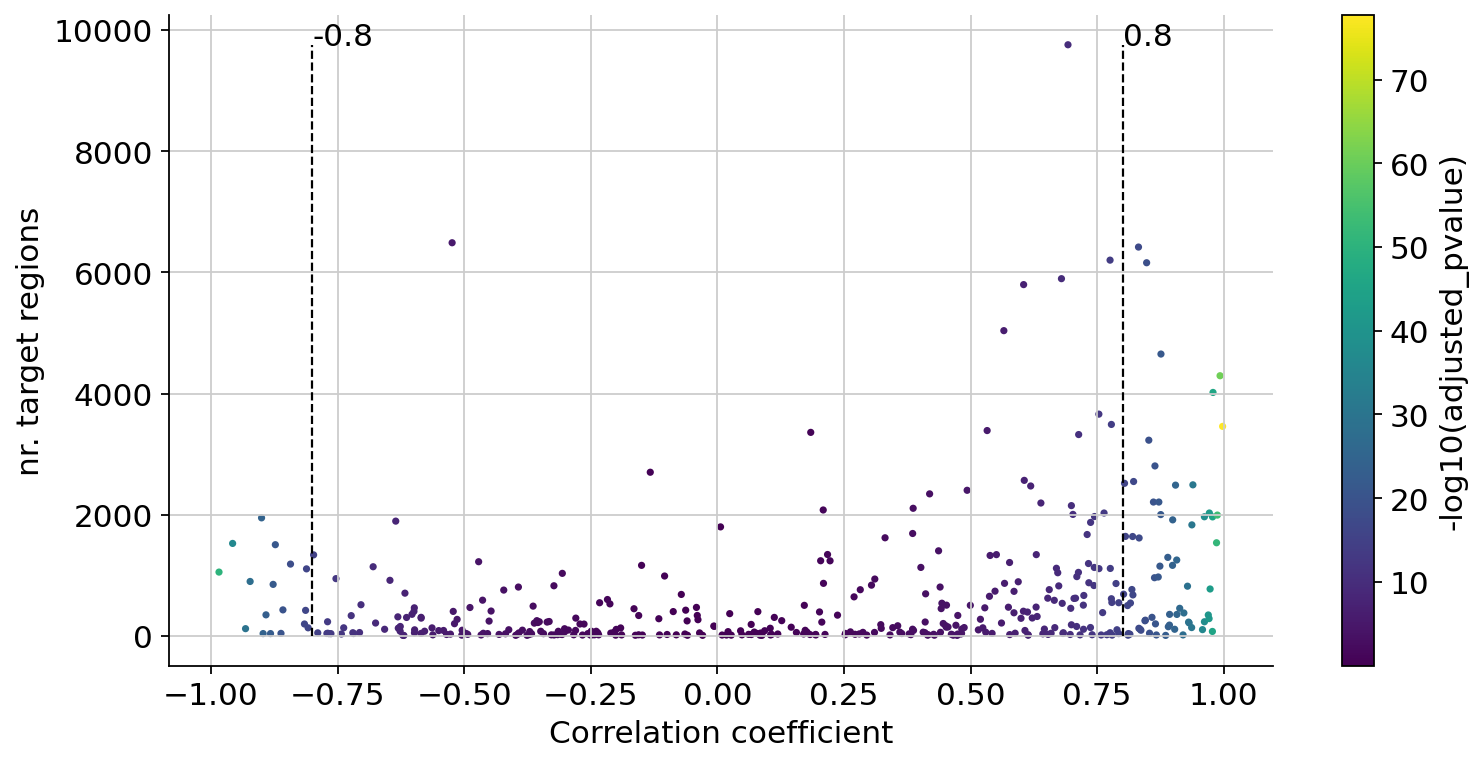

In [55]:
import numpy as np
n_targets = [int(x.split('(')[1].replace('r)', '')) for x in scplus_obj.uns['TF_cistrome_correlation']['filtered_region_based']['Cistrome']]
rho = scplus_obj.uns['TF_cistrome_correlation']['filtered_region_based']['Rho'].to_list()
adj_pval = scplus_obj.uns['TF_cistrome_correlation']['filtered_region_based']['Adjusted_p-value'].to_list()

thresholds = {
        'rho': [-0.8, 0.8],
        'n_targets': 0
}
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize = (10, 5))
sc = ax.scatter(rho, n_targets, c = -np.log10(adj_pval), s = 5)
ax.set_xlabel('Correlation coefficient')
ax.set_ylabel('nr. target regions')
#ax.hlines(y = thresholds['n_targets'], xmin = min(rho), xmax = max(rho), color = 'black', ls = 'dashed', lw = 1)
ax.vlines(x = thresholds['rho'], ymin = 0, ymax = max(n_targets), color = 'black', ls = 'dashed', lw = 1)
ax.text(x = thresholds['rho'][0], y = max(n_targets), s = str(thresholds['rho'][0]))
ax.text(x = thresholds['rho'][1], y = max(n_targets), s = str(thresholds['rho'][1]))
sns.despine(ax = ax)
fig.colorbar(sc, label = '-log10(adjusted_pvalue)', ax = ax)
plt.show()

In [56]:
selected_cistromes = scplus_obj.uns['TF_cistrome_correlation']['filtered_region_based'].loc[
        np.logical_or(
                scplus_obj.uns['TF_cistrome_correlation']['filtered_region_based']['Rho'] > thresholds['rho'][1],
                scplus_obj.uns['TF_cistrome_correlation']['filtered_region_based']['Rho'] < thresholds['rho'][0]
        )]['Cistrome'].to_list()
selected_eRegulons = [x.split('_(')[0] for x in selected_cistromes]
selected_eRegulons_gene_sig = [
        x for x in scplus_obj.uns['eRegulon_signatures_filtered']['Gene_based'].keys()
        if x.split('_(')[0] in selected_eRegulons]
selected_eRegulons_region_sig = [
        x for x in scplus_obj.uns['eRegulon_signatures_filtered']['Region_based'].keys()
        if x.split('_(')[0] in selected_eRegulons]
#save the results in the scenicplus object
scplus_obj.uns['selected_eRegulon'] = {'Gene_based': selected_eRegulons_gene_sig, 'Region_based': selected_eRegulons_region_sig}
print(f'selected: {len(selected_eRegulons_gene_sig)} eRegulons')

selected: 84 eRegulons


/vsc-hard-mounts/leuven-data/343/vsc34319/miniconda3/envs/ibp-2022-env/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



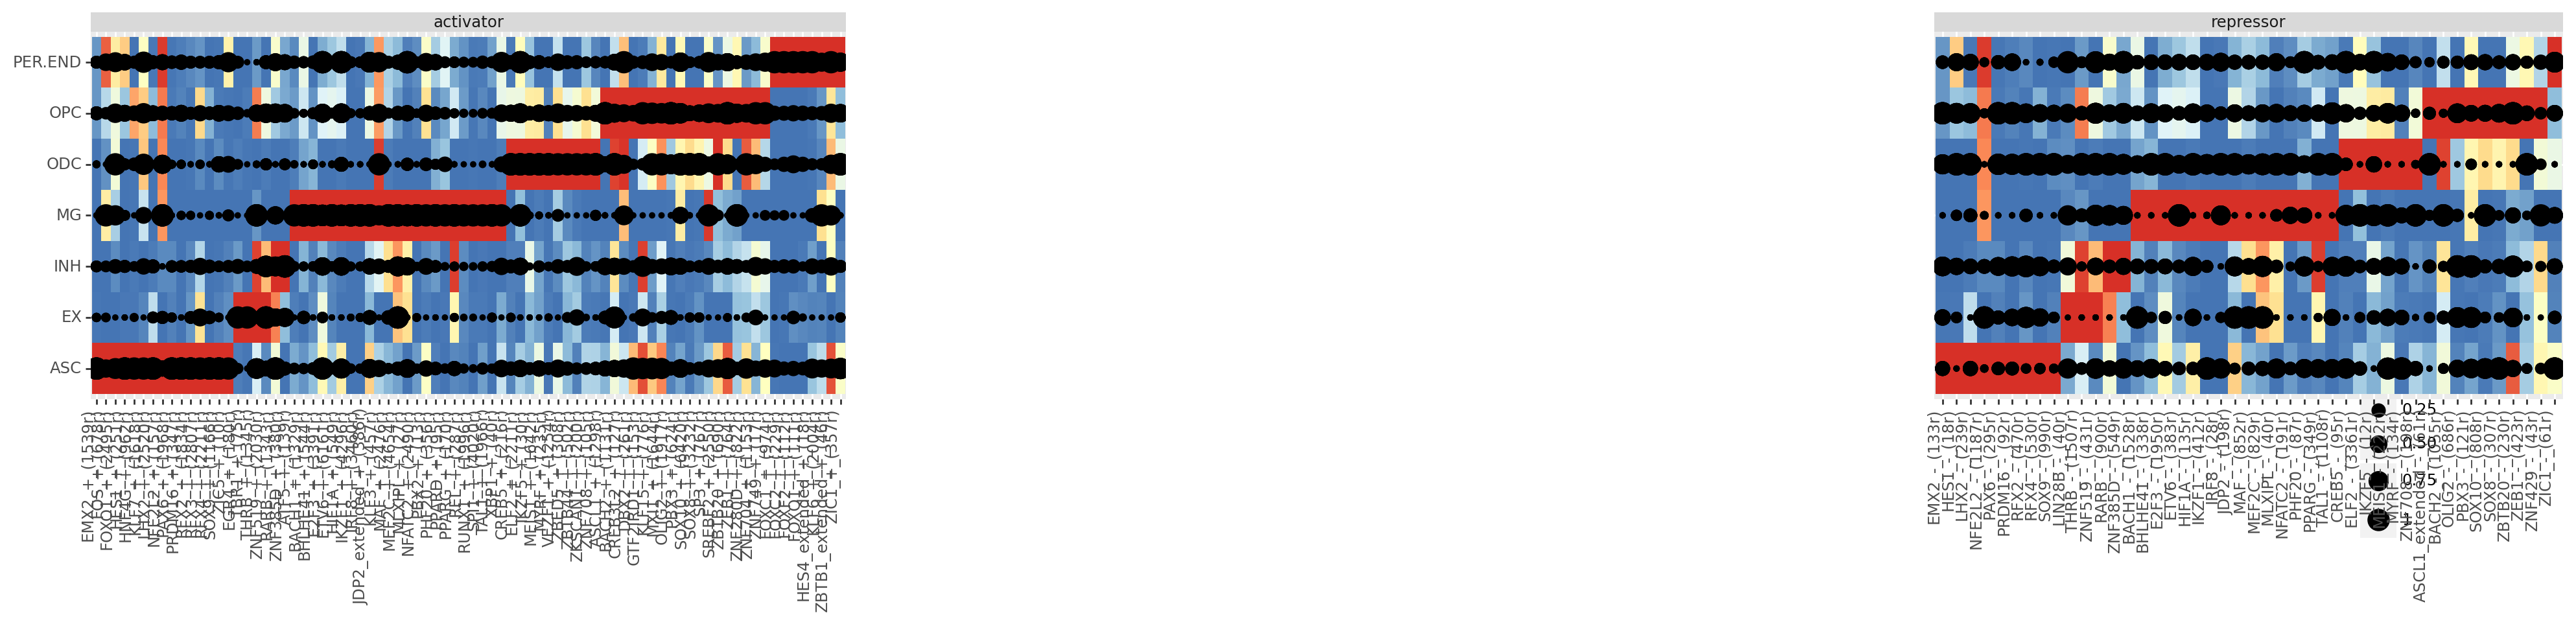

<ggplot: (1403290969890)>

In [57]:
from scenicplus.plotting.dotplot import heatmap_dotplot
heatmap_dotplot(
        scplus_obj = scplus_obj,
        size_matrix = scplus_obj.uns['eRegulon_AUC_filtered']['Region_based'], #specify what to plot as dot sizes, target region enrichment in this case
        color_matrix = scplus_obj.to_df('EXP'), #specify  what to plot as colors, TF expression in this case
        scale_size_matrix = True,
        scale_color_matrix = True,
        group_variable = 'celltype',
        subset_eRegulons = scplus_obj.uns['selected_eRegulon']['Gene_based'],
        # index_order = ['MM001', 'MM011', 'MM031', 'MM087', 'MM074', 'MM057', 'MM047', 'MM029', 'MM099'],
        figsize = (20, 5),
        orientation = 'horizontal')

In [60]:
scplus_obj.uns['selected_eRegulon']

{'Gene_based': ['ZIC1_+_(307g)',
  'CREB3L2_+_(110g)',
  'SOX9_+_(536g)',
  'FOXF2_+_(80g)',
  'FOS_+_(326g)',
  'GTF2IRD1_+_(147g)',
  'ZEB1_-_(309g)',
  'RFX3_+_(1371g)',
  'BHLHE41_+_(364g)',
  'EGR4_+_(116g)',
  'ZNF280D_+_(645g)',
  'HES4_extended_+_(19g)',
  'LIN28B_-_(22g)',
  'KLF7_+_(845g)',
  'MYRF_+_(236g)',
  'HES1_+_(230g)',
  'ZNF429_-_(35g)',
  'REL_+_(251g)',
  'RFX4_+_(1050g)',
  'IRF8_+_(938g)',
  'TAL1_+_(741g)',
  'SREBF2_+_(1165g)',
  'FOXC2_+_(141g)',
  'ZKSCAN1_+_(234g)',
  'NFE2L2_-_(377g)',
  'MLXIPL_-_(33g)',
  'ZNF519_+_(807g)',
  'HNF4G_+_(495g)',
  'TBR1_+_(66g)',
  'CREB5_+_(247g)',
  'THRB_-_(565g)',
  'FOXQ1_+_(86g)',
  'PHF20_+_(295g)',
  'OLIG2_+_(637g)',
  'MEF2C_+_(1350g)',
  'VEZF1_+_(644g)',
  'HIF1A_-_(103g)',
  'SP3_+_(486g)',
  'FOXO1_+_(1039g)',
  'ZNF704_+_(779g)',
  'DBX2_+_(167g)',
  'FOXC1_+_(391g)',
  'MEIS1_+_(892g)',
  'KLF3_+_(335g)',
  'ASCL1_+_(420g)',
  'EMX2_+_(663g)',
  'KLF15_+_(510g)',
  'PAX6_+_(704g)',
  'ELF2_+_(1071g)',
  'PP

In [61]:
from scenicplus.RSS import *
regulon_specificity_scores(
        scplus_obj,
        variable = 'celltype',
        auc_key = 'eRegulon_AUC_filtered',
        signature_keys = ['Region_based'],
        selected_regulons = [x for x in scplus_obj.uns['selected_eRegulon']['Region_based'] if '-' not in x],
        out_key_suffix = '_filtered')

/vsc-hard-mounts/leuven-data/343/vsc34319/miniconda3/envs/ibp-2022-env/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



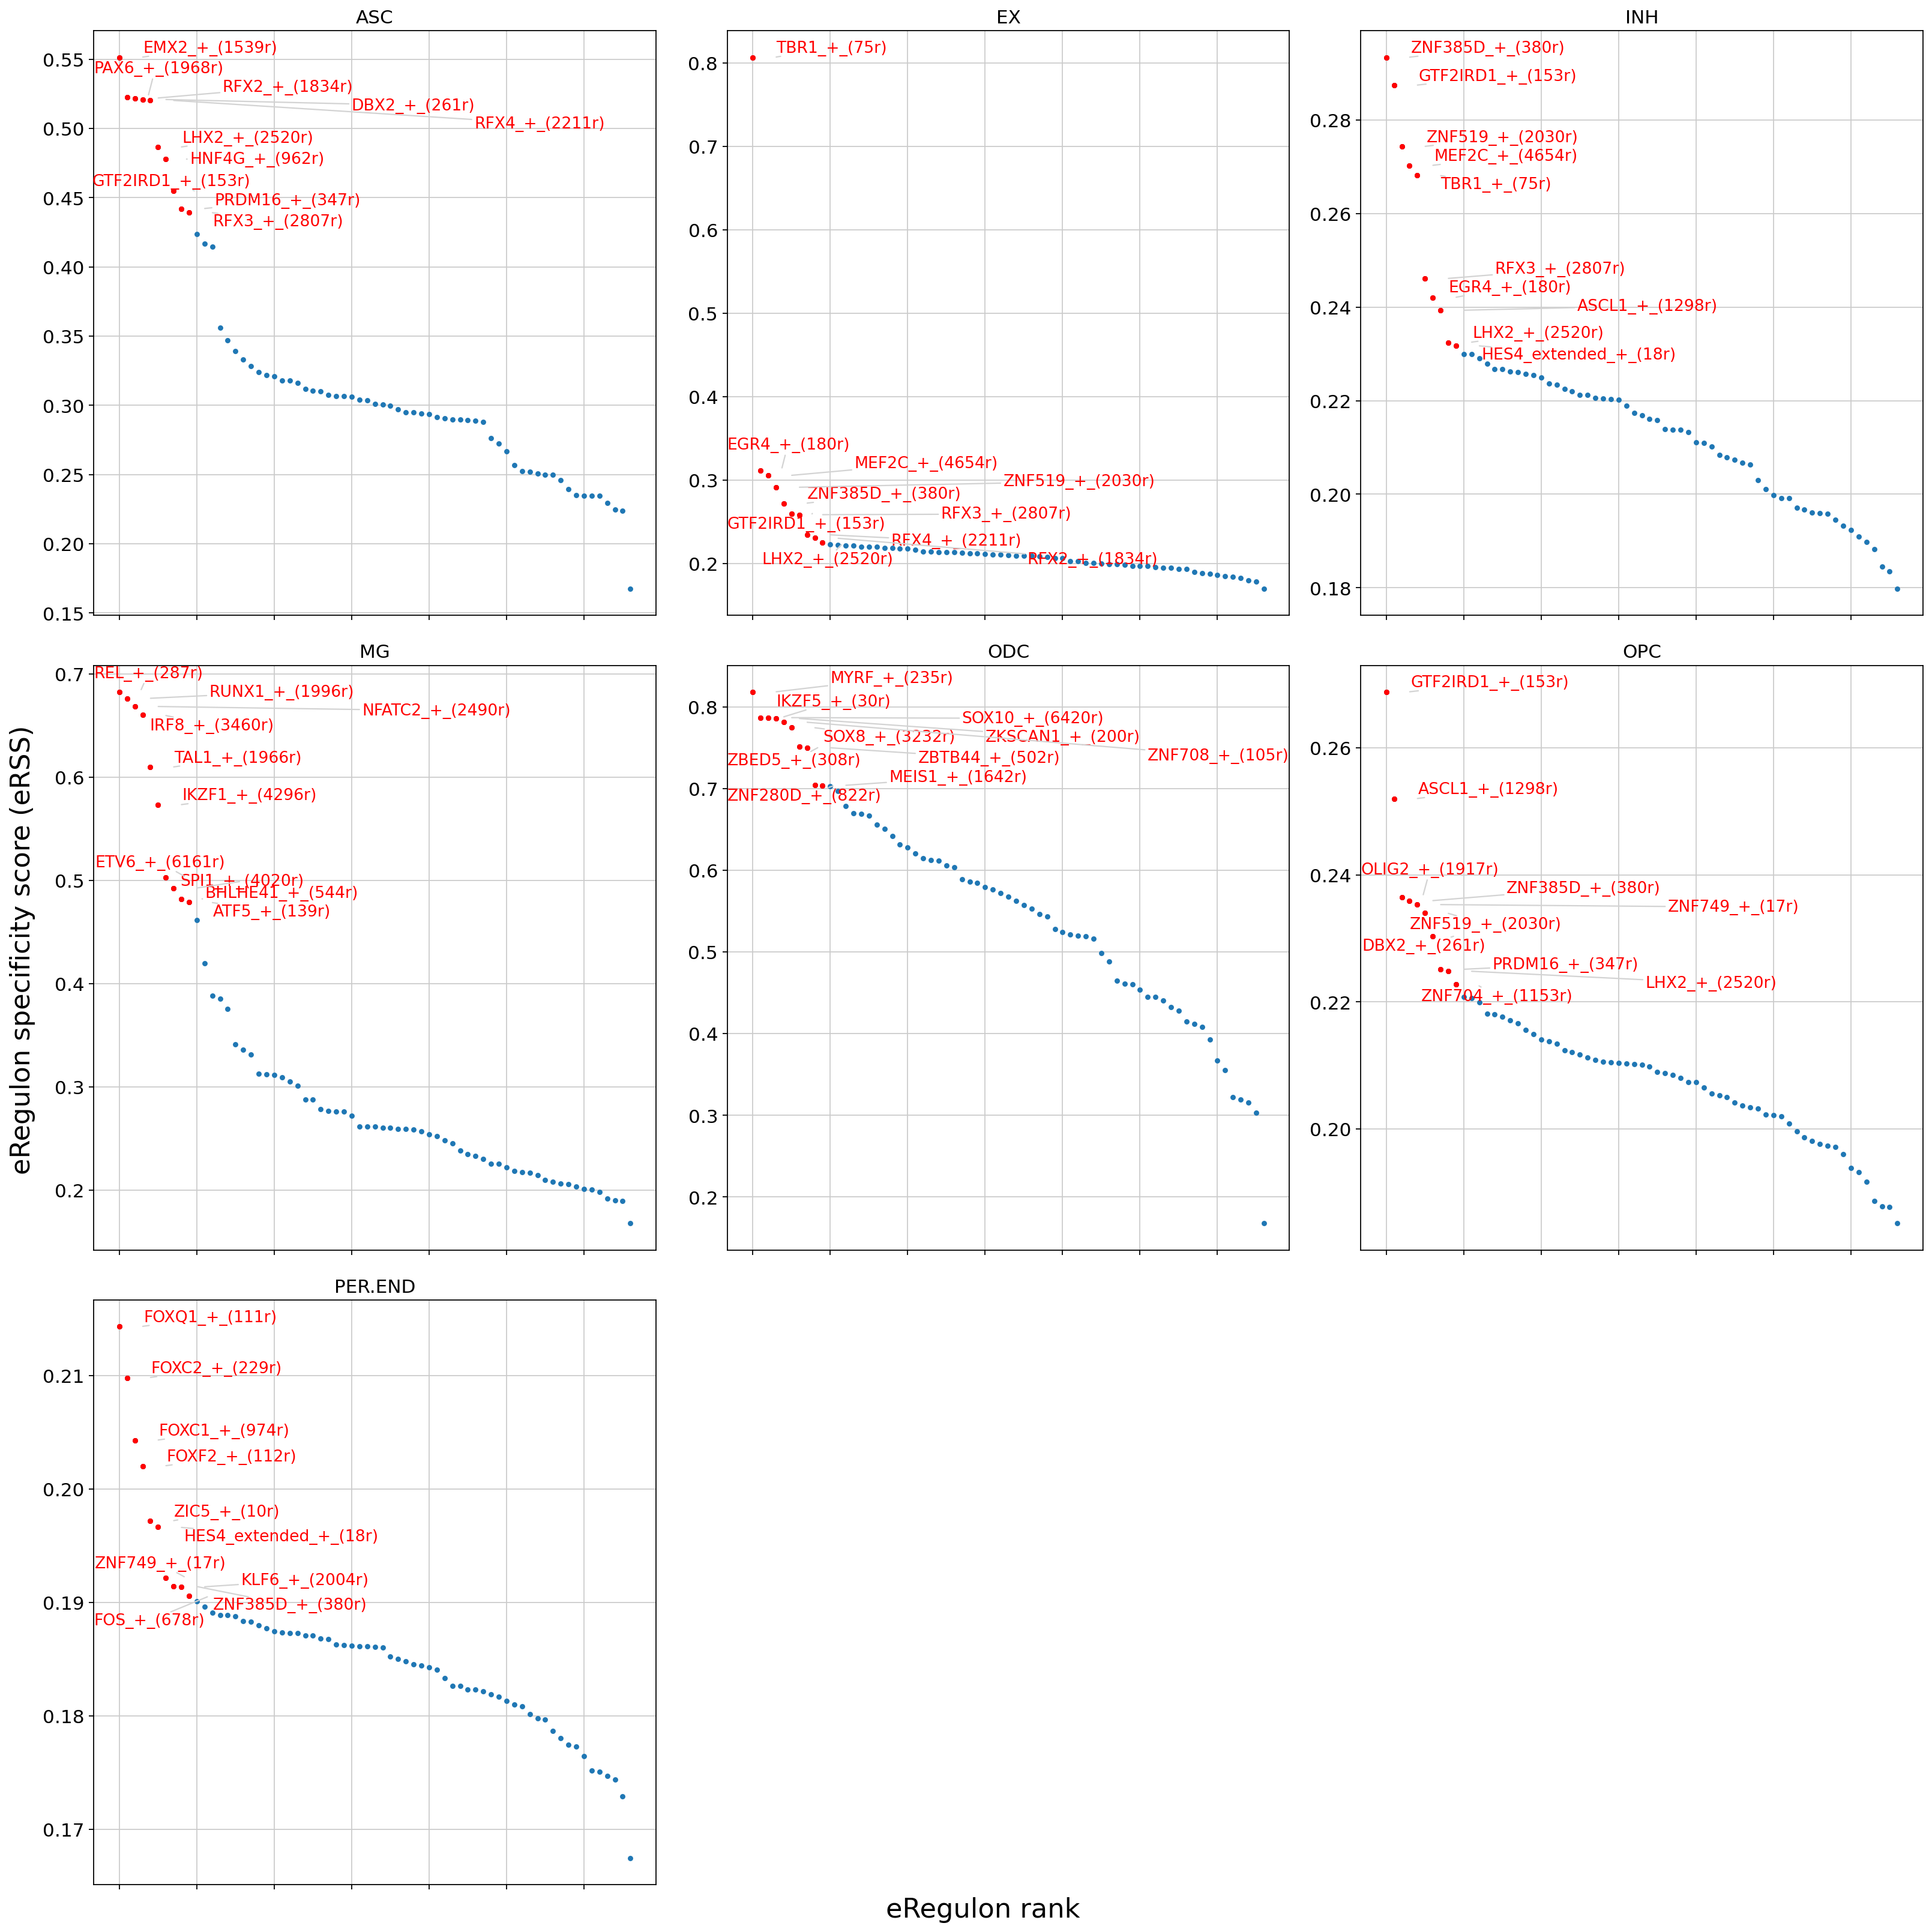

In [62]:
plot_rss(scplus_obj, 'celltype_filtered', num_columns=3, top_n=10, figsize = (20, 20))


In [63]:
flat_list = lambda t: [item for sublist in t for item in sublist]
selected_markers = list(set(flat_list(
    [scplus_obj.uns['RSS']['celltype_filtered'].loc[celltype].sort_values(ascending = False).head(50).index.to_list()
    for celltype in scplus_obj.uns['RSS']['celltype_filtered'].index])))

/vsc-hard-mounts/leuven-data/343/vsc34319/miniconda3/envs/ibp-2022-env/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



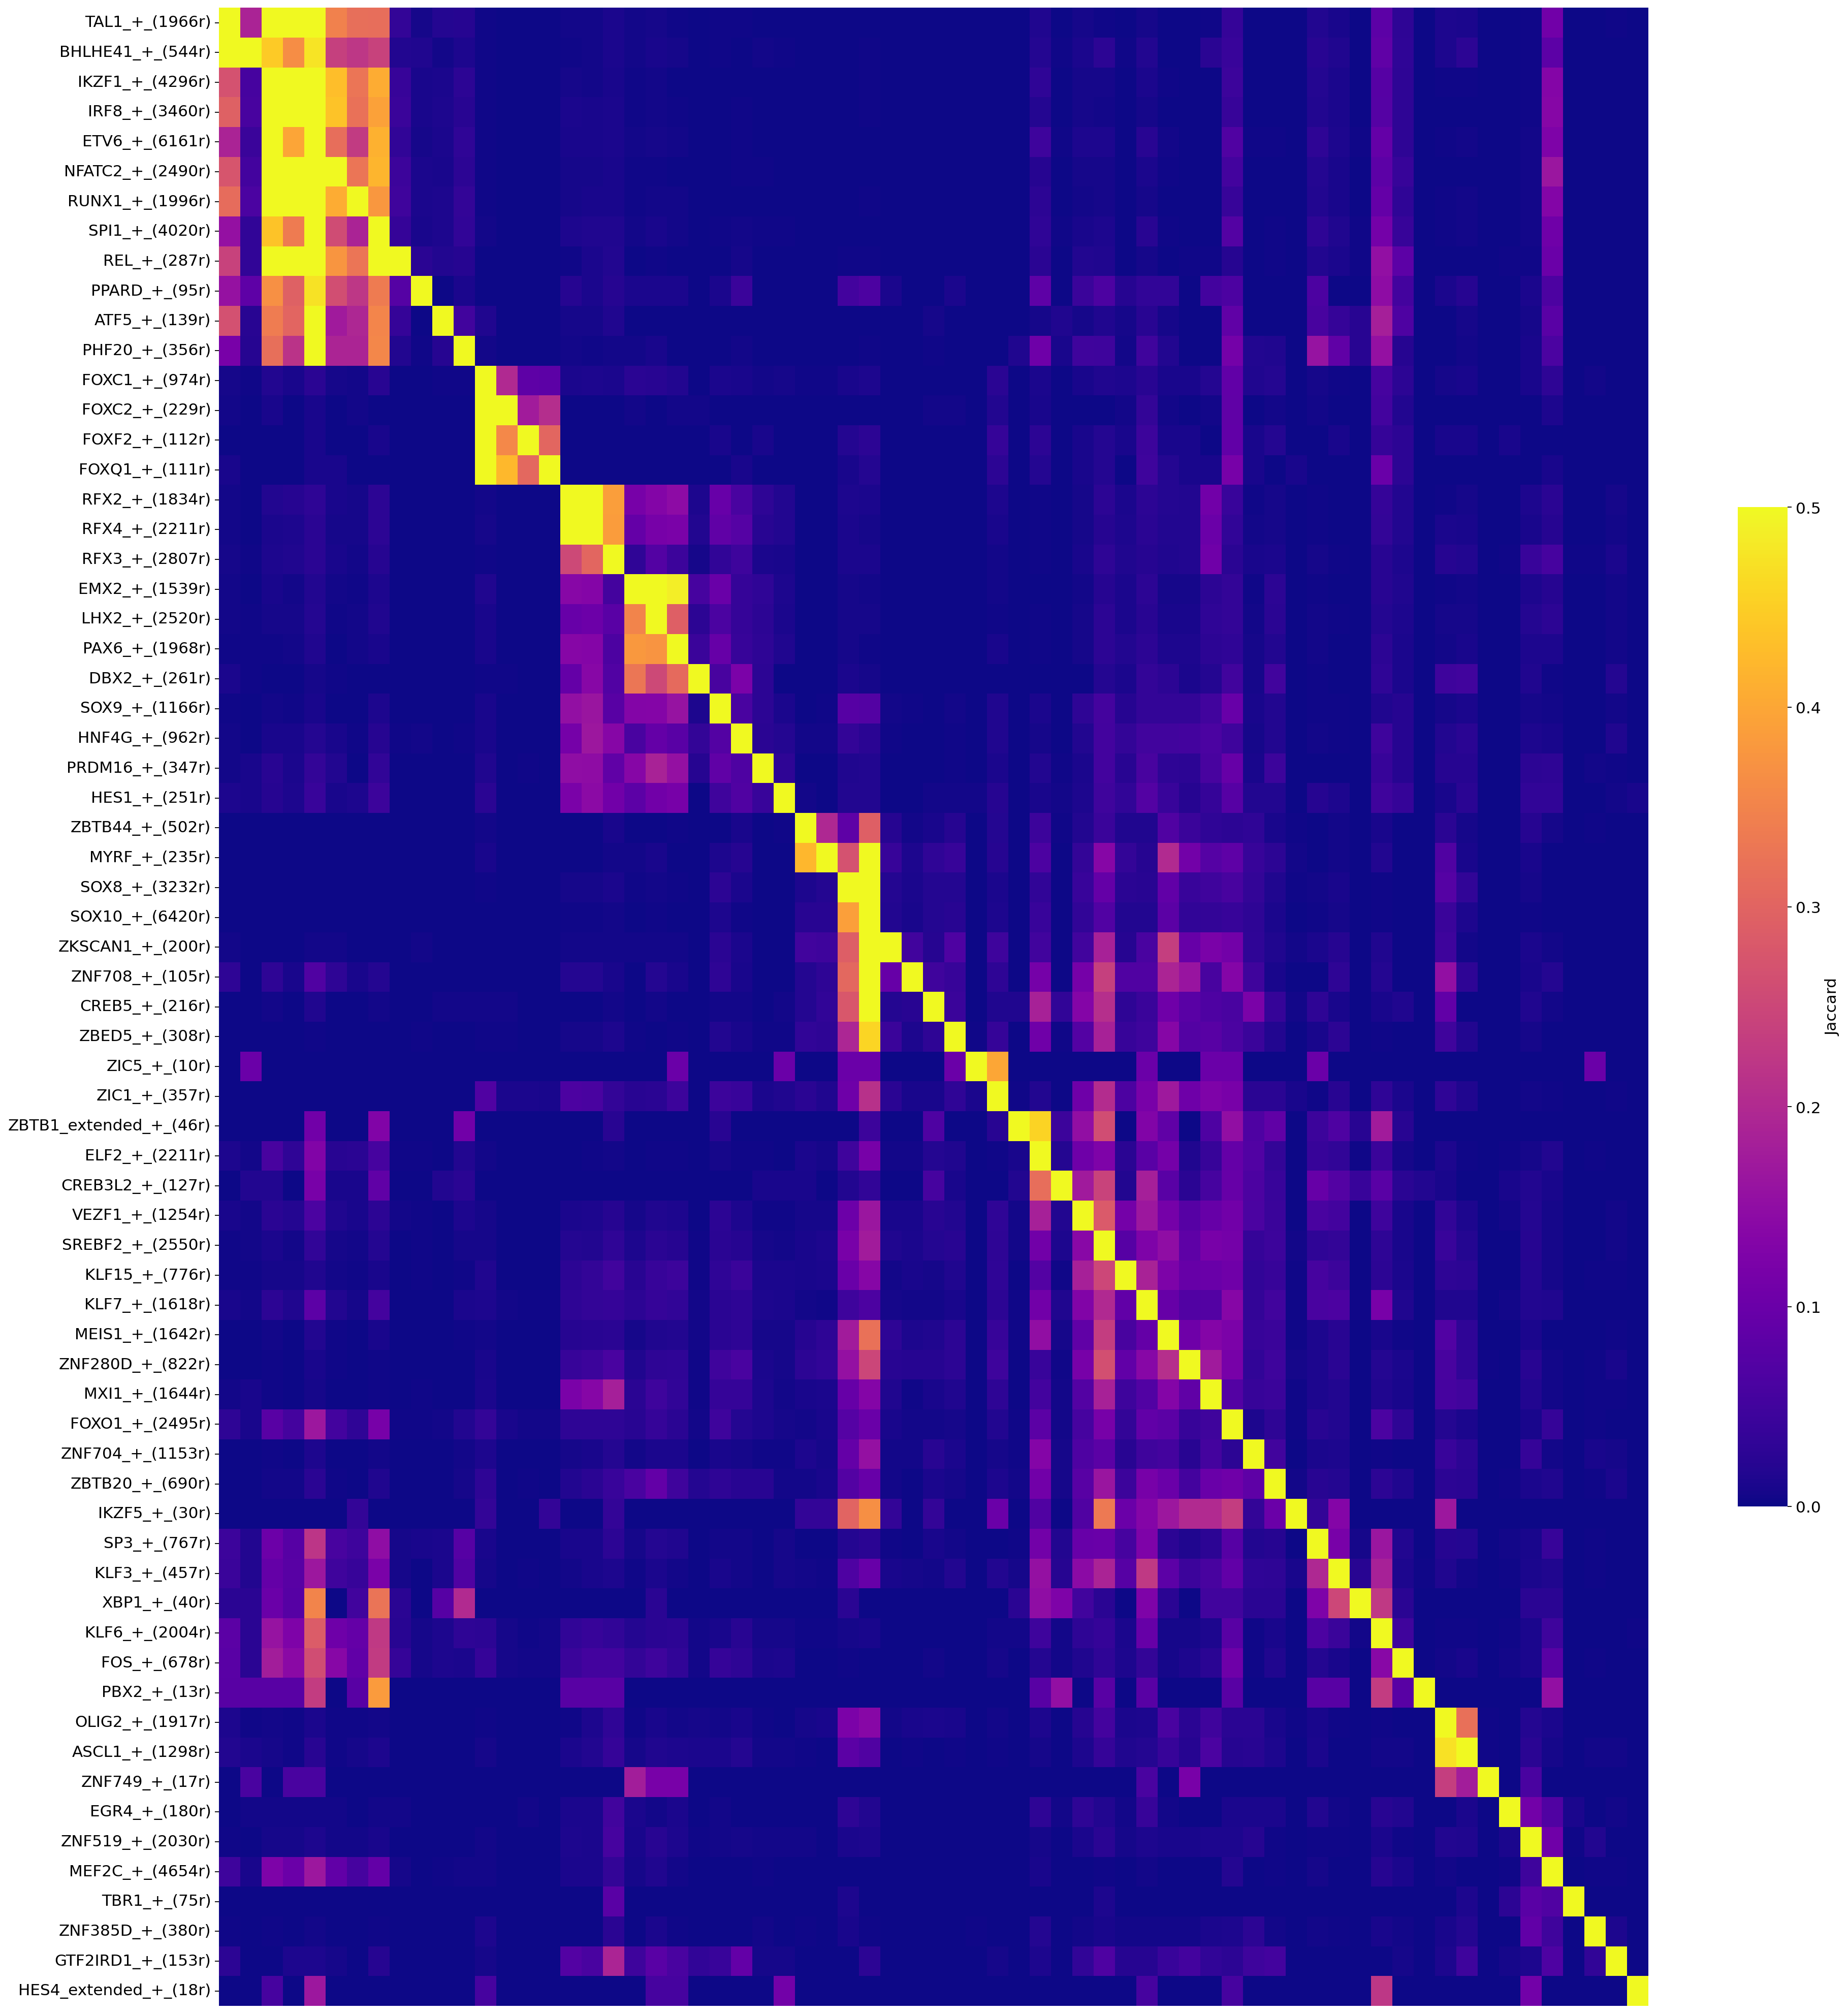

In [64]:
from scenicplus.plotting.correlation_plot import *

region_intersetc_data, Z = jaccard_heatmap(
        scplus_obj,
        method = 'intersect',
        gene_or_region_based = 'Region_based',
        use_plotly = False,
        selected_regulons = selected_markers,
        signature_key = 'eRegulon_signatures_filtered',
        figsize = (25, 25), return_data = True, vmax = 0.5, cmap = 'plasma')

In [65]:
selected_markers

['SOX8_+_(3232r)',
 'HNF4G_+_(962r)',
 'SOX10_+_(6420r)',
 'FOS_+_(678r)',
 'REL_+_(287r)',
 'PBX2_+_(13r)',
 'XBP1_+_(40r)',
 'ZIC1_+_(357r)',
 'NFATC2_+_(2490r)',
 'IKZF5_+_(30r)',
 'FOXC1_+_(974r)',
 'MEF2C_+_(4654r)',
 'SREBF2_+_(2550r)',
 'ATF5_+_(139r)',
 'RUNX1_+_(1996r)',
 'RFX4_+_(2211r)',
 'PHF20_+_(356r)',
 'ELF2_+_(2211r)',
 'IKZF1_+_(4296r)',
 'OLIG2_+_(1917r)',
 'ZNF749_+_(17r)',
 'VEZF1_+_(1254r)',
 'KLF3_+_(457r)',
 'MEIS1_+_(1642r)',
 'EGR4_+_(180r)',
 'HES4_extended_+_(18r)',
 'ZNF280D_+_(822r)',
 'BHLHE41_+_(544r)',
 'CREB5_+_(216r)',
 'LHX2_+_(2520r)',
 'TAL1_+_(1966r)',
 'FOXC2_+_(229r)',
 'RFX3_+_(2807r)',
 'DBX2_+_(261r)',
 'SPI1_+_(4020r)',
 'FOXF2_+_(112r)',
 'TBR1_+_(75r)',
 'MYRF_+_(235r)',
 'KLF7_+_(1618r)',
 'KLF15_+_(776r)',
 'PPARD_+_(95r)',
 'ZNF385D_+_(380r)',
 'EMX2_+_(1539r)',
 'ZBTB20_+_(690r)',
 'GTF2IRD1_+_(153r)',
 'ASCL1_+_(1298r)',
 'FOXO1_+_(2495r)',
 'KLF6_+_(2004r)',
 'PAX6_+_(1968r)',
 'ZNF519_+_(2030r)',
 'ZIC5_+_(10r)',
 'MXI1_+_(1644r)',


In [66]:
from pycisTopic.diff_features import find_highly_variable_features
hvr = find_highly_variable_features(scplus_obj.to_df('ACC').loc[list(set(scplus_obj.uns['eRegulon_metadata_filtered']['Region']))], n_top_features=1000, plot = False)
hvg = find_highly_variable_features(scplus_obj.to_df('EXP')[list(set(scplus_obj.uns['eRegulon_metadata_filtered']['Gene']))].T, n_top_features=1000, plot = False)

2022-11-30 19:11:58,453 cisTopic     INFO     Calculating mean
2022-11-30 19:11:58,872 cisTopic     INFO     Calculating variance
2022-11-30 19:12:08,117 cisTopic     INFO     Done!
2022-11-30 19:12:08,483 cisTopic     INFO     Calculating mean
2022-11-30 19:12:08,548 cisTopic     INFO     Calculating variance
2022-11-30 19:12:09,019 cisTopic     INFO     Done!


<Figure size 400x400 with 0 Axes>

<Figure size 400x400 with 0 Axes>

In [67]:
from scenicplus.networks import create_nx_tables, create_nx_graph, plot_networkx, export_to_cytoscape
nx_tables = create_nx_tables(
    scplus_obj = scplus_obj,
    eRegulon_metadata_key ='eRegulon_metadata_filtered',
    subset_eRegulons = ['RFX4', 'EMX2', 'PAX6', 'RFX2', 'LHX2'],
    subset_regions = hvr,
    subset_genes = hvg,
    add_differential_gene_expression = True,
    add_differential_region_accessibility = True,
    differential_variable = ['celltype'])

/vsc-hard-mounts/leuven-data/343/vsc34319/miniconda3/envs/ibp-2022-env/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning:

Trying to modify attribute `.obs` of view, initializing view as actual.

... storing 'celltype' as categorical
/vsc-hard-mounts/leuven-data/343/vsc34319/miniconda3/envs/ibp-2022-env/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning:

Trying to modify attribute `.obs` of view, initializing view as actual.

... storing 'celltype' as categorical
/vsc-hard-mounts/leuven-data/343/vsc34319/miniconda3/envs/ibp-2022-env/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning:

Trying to modify attribute `.obs` of view, initializing view as actual.

... storing 'celltype' as categorical


In [68]:
G, pos, edge_tables, node_tables = create_nx_graph(nx_tables,
                   use_edge_tables = ['TF2R','R2G'],
                   color_edge_by = {'TF2R': {'variable' : 'TF', 'category_color' : {'RFX4': 'Green','EMX2': 'Red', 'PAX6': 'Blue', 'RFX2': 'Orange', 'LHX2': 'Purple'}},
                                    'R2G': {'variable' : 'R2G_rho', 'continuous_color' : 'viridis', 'v_min': -1, 'v_max': 1}},
                   transparency_edge_by =  {'R2G': {'variable' : 'R2G_importance', 'min_alpha': 0.1, 'v_min': 0}},
                   width_edge_by = {'R2G': {'variable' : 'R2G_importance', 'max_size' :  1.5, 'min_size' : 1}},
                   color_node_by = {'TF': {'variable': 'TF', 'category_color' : {'RFX4': 'Green','EMX2': 'Red', 'PAX6': 'Blue', 'RFX2': 'Orange', 'LHX2': 'Purple'}},
                                    'Gene': {'variable': 'celltype_Log2FC_ASC', 'continuous_color' : 'bwr'},
                                    'Region': {'variable': 'celltype_Log2FC_ASC', 'continuous_color' : 'viridis'}},
                   transparency_node_by =  {'Region': {'variable' : 'celltype_Log2FC_ASC', 'min_alpha': 0.1},
                                    'Gene': {'variable' : 'celltype_Log2FC_ASC', 'min_alpha': 0.1}},
                   size_node_by = {'TF': {'variable': 'fixed_size', 'fixed_size': 30},
                                    'Gene': {'variable': 'fixed_size', 'fixed_size': 15},
                                    'Region': {'variable': 'fixed_size', 'fixed_size': 10}},
                   shape_node_by = {'TF': {'variable': 'fixed_shape', 'fixed_shape': 'ellipse'},
                                    'Gene': {'variable': 'fixed_shape', 'fixed_shape': 'ellipse'},
                                    'Region': {'variable': 'fixed_shape', 'fixed_shape': 'diamond'}},
                   label_size_by = {'TF': {'variable': 'fixed_label_size', 'fixed_label_size': 30.0},
                                    'Gene': {'variable': 'fixed_label_size', 'fixed_label_size': 20.0},
                                    'Region': {'variable': 'fixed_label_size', 'fixed_label_size': 0.0}},
                   layout='kamada_kawai_layout',
                   scale_position_by=250)

/vsc-hard-mounts/leuven-data/343/vsc34319/miniconda3/envs/ibp-2022-env/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



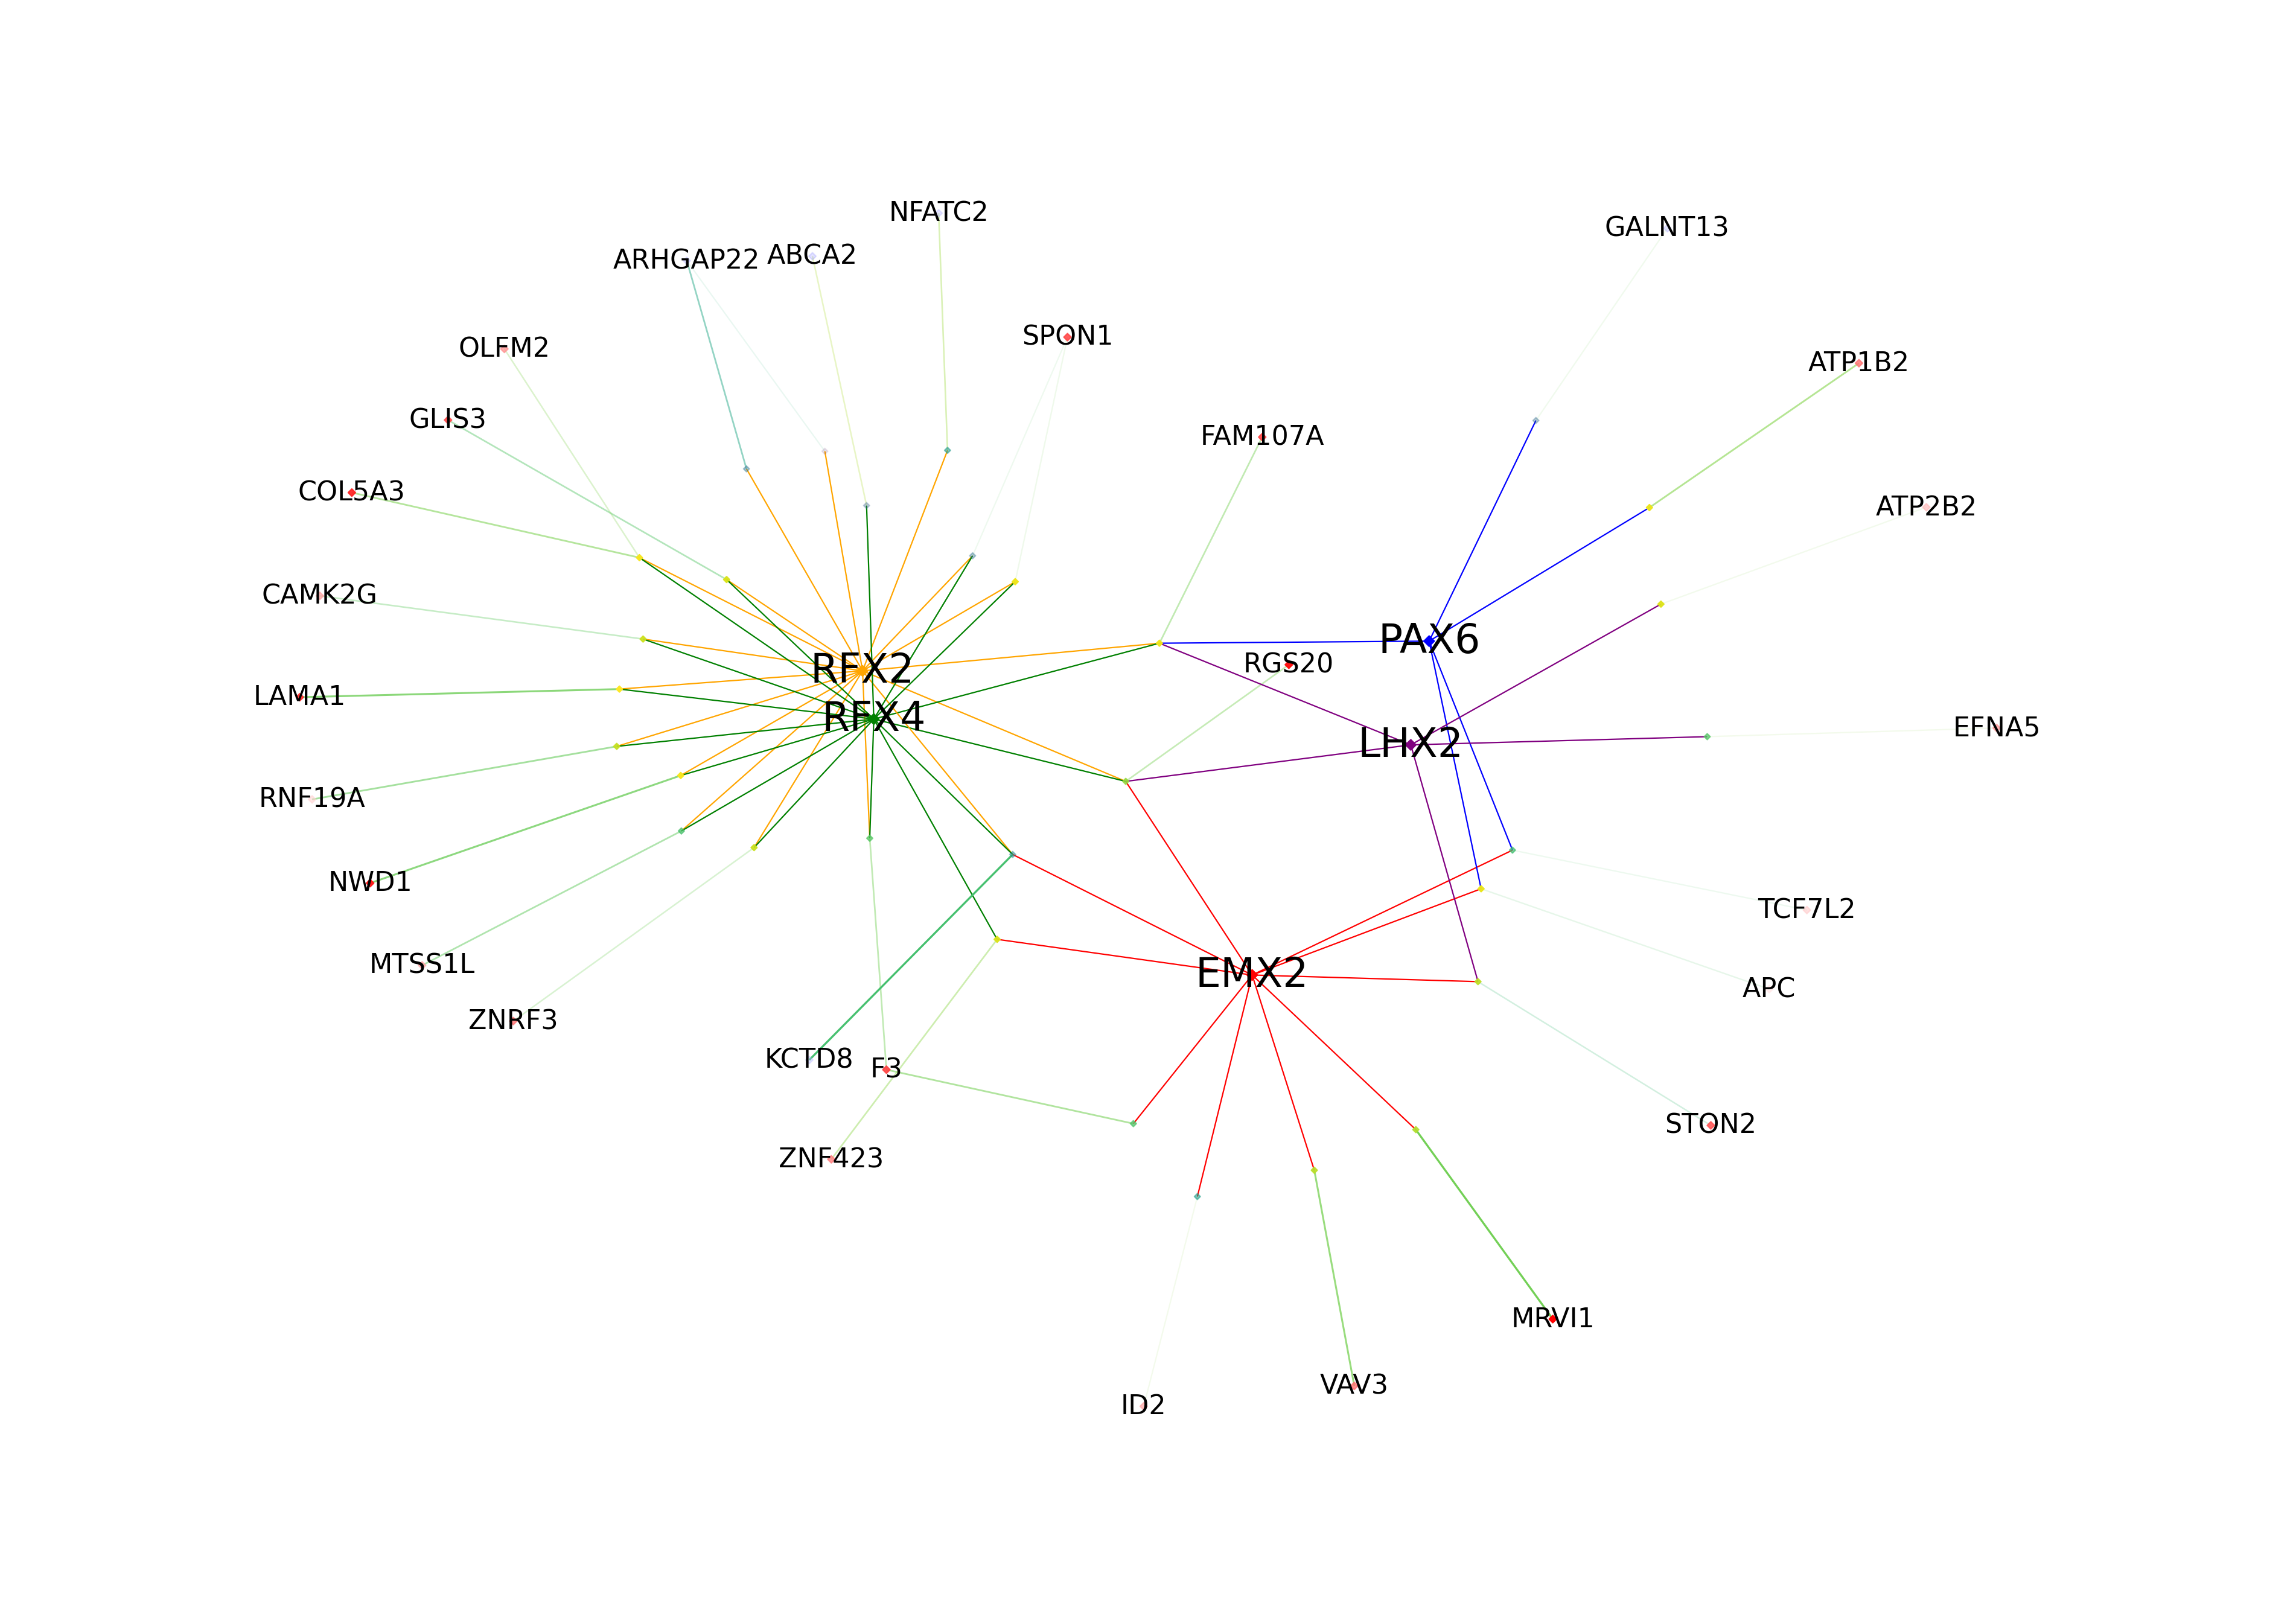

In [69]:
plt.figure(figsize=(24,17))
plot_networkx(G, pos)

In [70]:
from scenicplus.networks import create_nx_tables, create_nx_graph, plot_networkx, export_to_cytoscape
nx_tables = create_nx_tables(
    scplus_obj = scplus_obj,
    eRegulon_metadata_key ='eRegulon_metadata_filtered',
    subset_eRegulons = ['SOX10', 'SOX8', 'ZBED5'],
    subset_regions = hvr,
    subset_genes = hvg,
    add_differential_gene_expression = True,
    add_differential_region_accessibility = True,
    differential_variable = ['celltype'])

/vsc-hard-mounts/leuven-data/343/vsc34319/miniconda3/envs/ibp-2022-env/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning:

Trying to modify attribute `.obs` of view, initializing view as actual.

... storing 'celltype' as categorical
/vsc-hard-mounts/leuven-data/343/vsc34319/miniconda3/envs/ibp-2022-env/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning:

Trying to modify attribute `.obs` of view, initializing view as actual.

... storing 'celltype' as categorical
/vsc-hard-mounts/leuven-data/343/vsc34319/miniconda3/envs/ibp-2022-env/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning:

Trying to modify attribute `.obs` of view, initializing view as actual.

... storing 'celltype' as categorical


In [71]:
G, pos, edge_tables, node_tables = create_nx_graph(nx_tables,
                   use_edge_tables = ['TF2R','R2G'],
                   color_edge_by = {'TF2R': {'variable' : 'TF', 'category_color' : {'SOX10': 'Blue', 'SOX8': 'Orange', 'ZBED5': 'Red'}},
                                    'R2G': {'variable' : 'R2G_rho', 'continuous_color' : 'viridis', 'v_min': -1, 'v_max': 1}},
                   transparency_edge_by =  {'R2G': {'variable' : 'R2G_importance', 'min_alpha': 0.1, 'v_min': 0}},
                   width_edge_by = {'R2G': {'variable' : 'R2G_importance', 'max_size' :  1.5, 'min_size' : 1}},
                   color_node_by = {'TF': {'variable': 'TF', 'category_color' : {'SOX10': 'Blue', 'SOX8': 'Orange', 'ZBED5': 'Red'}},
                                    'Gene': {'variable': 'celltype_Log2FC_MG', 'continuous_color' : 'bwr'},
                                    'Region': {'variable': 'celltype_Log2FC_MG', 'continuous_color' : 'viridis'}},
                   transparency_node_by =  {'Region': {'variable' : 'celltype_Log2FC_MG', 'min_alpha': 0.1},
                                    'Gene': {'variable' : 'celltype_Log2FC_MG', 'min_alpha': 0.1}},
                   size_node_by = {'TF': {'variable': 'fixed_size', 'fixed_size': 30},
                                    'Gene': {'variable': 'fixed_size', 'fixed_size': 15},
                                    'Region': {'variable': 'fixed_size', 'fixed_size': 10}},
                   shape_node_by = {'TF': {'variable': 'fixed_shape', 'fixed_shape': 'ellipse'},
                                    'Gene': {'variable': 'fixed_shape', 'fixed_shape': 'ellipse'},
                                    'Region': {'variable': 'fixed_shape', 'fixed_shape': 'diamond'}},
                   label_size_by = {'TF': {'variable': 'fixed_label_size', 'fixed_label_size': 30.0},
                                    'Gene': {'variable': 'fixed_label_size', 'fixed_label_size': 20.0},
                                    'Region': {'variable': 'fixed_label_size', 'fixed_label_size': 0.0}},
                   layout='kamada_kawai_layout',
                   scale_position_by=250)

/vsc-hard-mounts/leuven-data/343/vsc34319/miniconda3/envs/ibp-2022-env/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



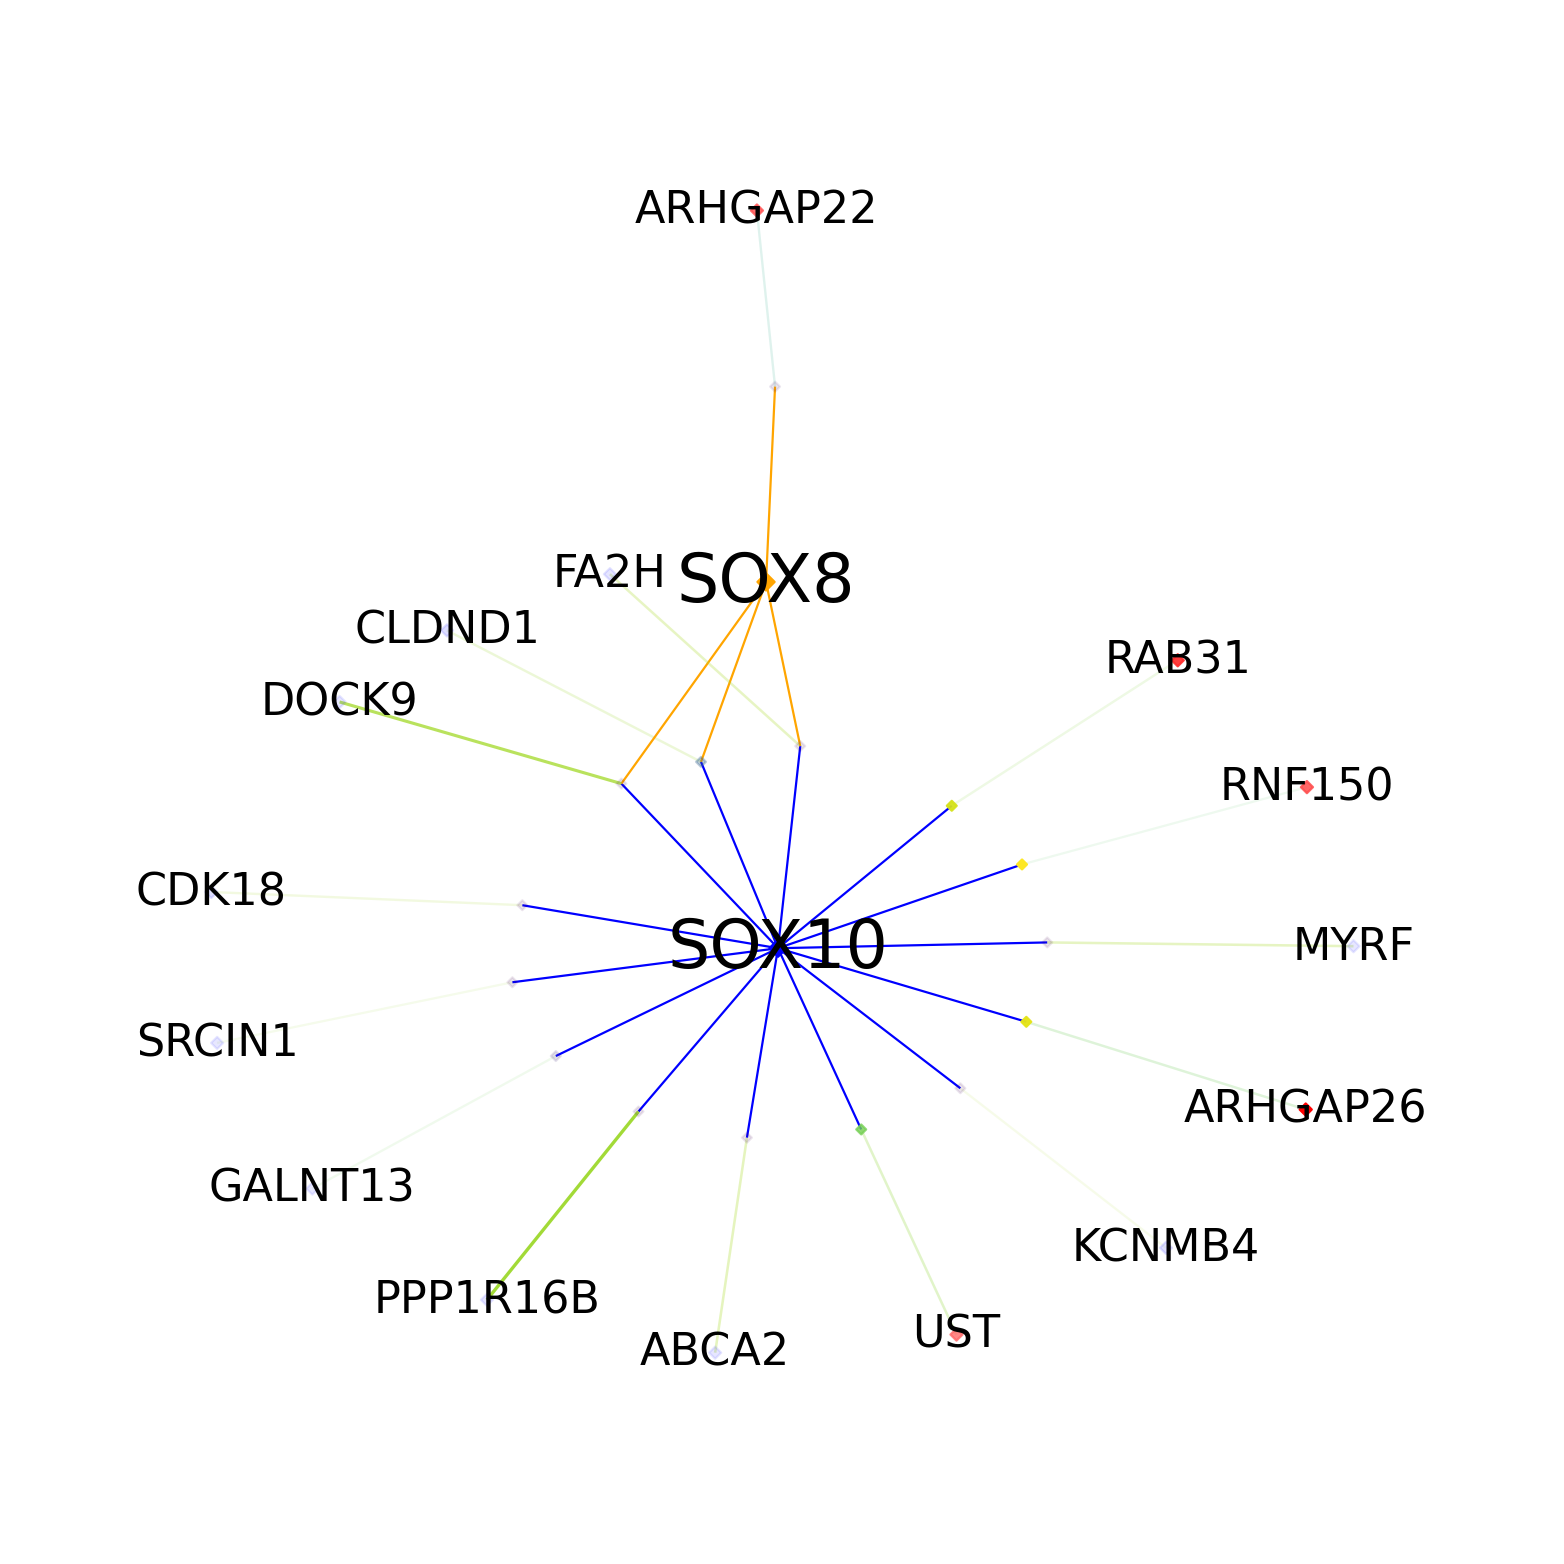

In [72]:
plt.figure(figsize=(10,10))
plot_networkx(G, pos)

In [73]:
from scenicplus.networks import create_nx_tables, create_nx_graph, plot_networkx, export_to_cytoscape
nx_tables = create_nx_tables(
    scplus_obj = scplus_obj,
    eRegulon_metadata_key ='eRegulon_metadata_filtered',
    subset_eRegulons = ['MEF2C'],
    subset_regions = hvr,
    subset_genes = hvg,
    add_differential_gene_expression = True,
    add_differential_region_accessibility = True,
    differential_variable = ['celltype'])

/vsc-hard-mounts/leuven-data/343/vsc34319/miniconda3/envs/ibp-2022-env/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning:

Trying to modify attribute `.obs` of view, initializing view as actual.

... storing 'celltype' as categorical
/vsc-hard-mounts/leuven-data/343/vsc34319/miniconda3/envs/ibp-2022-env/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning:

Trying to modify attribute `.obs` of view, initializing view as actual.

... storing 'celltype' as categorical
/vsc-hard-mounts/leuven-data/343/vsc34319/miniconda3/envs/ibp-2022-env/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning:

Trying to modify attribute `.obs` of view, initializing view as actual.

... storing 'celltype' as categorical


In [74]:
G, pos, edge_tables, node_tables = create_nx_graph(nx_tables,
                   use_edge_tables = ['TF2R','R2G'],
                   color_edge_by = {'TF2R': {'variable' : 'TF', 'category_color' : {'MEF2C': 'Pink'}},
                                    'R2G': {'variable' : 'R2G_rho', 'continuous_color' : 'viridis', 'v_min': -1, 'v_max': 1}},
                   transparency_edge_by =  {'R2G': {'variable' : 'R2G_importance', 'min_alpha': 0.1, 'v_min': 0}},
                   width_edge_by = {'R2G': {'variable' : 'R2G_importance', 'max_size' :  1.5, 'min_size' : 1}},
                   color_node_by = {'TF': {'variable': 'TF', 'category_color' : {'MEF2C': 'Pink'}},
                                    'Gene': {'variable': 'celltype_Log2FC_MG', 'continuous_color' : 'bwr'},
                                    'Region': {'variable': 'celltype_Log2FC_MG', 'continuous_color' : 'viridis'}},
                   transparency_node_by =  {'Region': {'variable' : 'celltype_Log2FC_MG', 'min_alpha': 0.1},
                                    'Gene': {'variable' : 'celltype_Log2FC_MG', 'min_alpha': 0.1}},
                   size_node_by = {'TF': {'variable': 'fixed_size', 'fixed_size': 30},
                                    'Gene': {'variable': 'fixed_size', 'fixed_size': 15},
                                    'Region': {'variable': 'fixed_size', 'fixed_size': 10}},
                   shape_node_by = {'TF': {'variable': 'fixed_shape', 'fixed_shape': 'ellipse'},
                                    'Gene': {'variable': 'fixed_shape', 'fixed_shape': 'ellipse'},
                                    'Region': {'variable': 'fixed_shape', 'fixed_shape': 'diamond'}},
                   label_size_by = {'TF': {'variable': 'fixed_label_size', 'fixed_label_size': 30.0},
                                    'Gene': {'variable': 'fixed_label_size', 'fixed_label_size': 20.0},
                                    'Region': {'variable': 'fixed_label_size', 'fixed_label_size': 0.0}},
                   layout='kamada_kawai_layout',
                   scale_position_by=250)

/vsc-hard-mounts/leuven-data/343/vsc34319/miniconda3/envs/ibp-2022-env/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



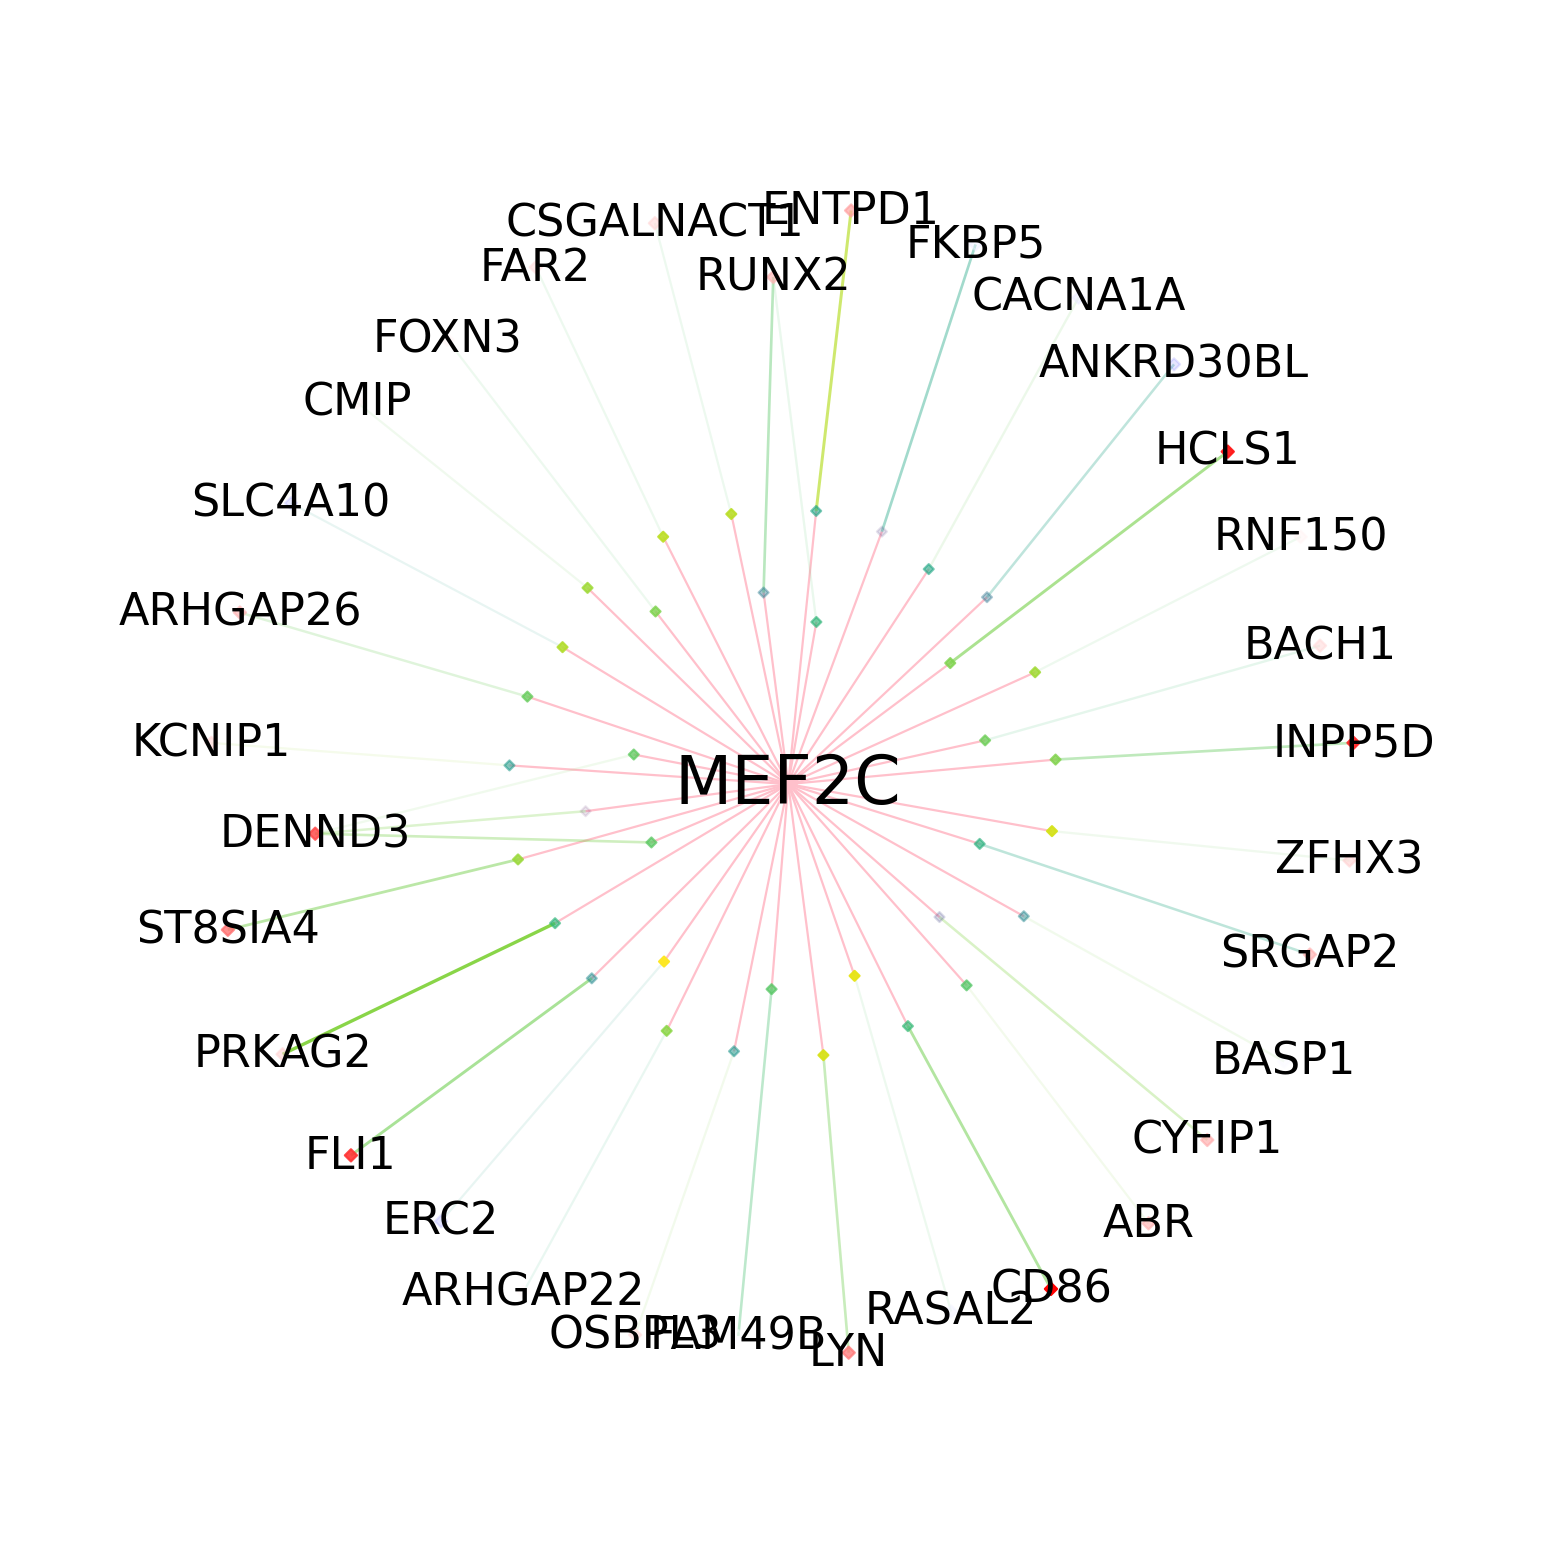

In [75]:
plt.figure(figsize=(10,10))
plot_networkx(G, pos)

In [76]:
from scenicplus.networks import create_nx_tables, create_nx_graph, plot_networkx, export_to_cytoscape
nx_tables = create_nx_tables(
    scplus_obj = scplus_obj,
    eRegulon_metadata_key ='eRegulon_metadata_filtered',
    subset_eRegulons = ['REL', 'RUNX1', 'NFACT2'],
    subset_regions = hvr,
    subset_genes = hvg,
    add_differential_gene_expression = True,
    add_differential_region_accessibility = True,
    differential_variable = ['celltype'])

/vsc-hard-mounts/leuven-data/343/vsc34319/miniconda3/envs/ibp-2022-env/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning:

Trying to modify attribute `.obs` of view, initializing view as actual.

... storing 'celltype' as categorical
/vsc-hard-mounts/leuven-data/343/vsc34319/miniconda3/envs/ibp-2022-env/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning:

Trying to modify attribute `.obs` of view, initializing view as actual.

... storing 'celltype' as categorical
/vsc-hard-mounts/leuven-data/343/vsc34319/miniconda3/envs/ibp-2022-env/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning:

Trying to modify attribute `.obs` of view, initializing view as actual.

... storing 'celltype' as categorical


In [77]:
G, pos, edge_tables, node_tables = create_nx_graph(nx_tables,
                   use_edge_tables = ['TF2R','R2G'],
                   color_edge_by = {'TF2R': {'variable' : 'TF', 'category_color' : {'REL': 'Green', 'RUNX1': 'Blue', 'NFACT2': 'Purple'}},
                                    'R2G': {'variable' : 'R2G_rho', 'continuous_color' : 'viridis', 'v_min': -1, 'v_max': 1}},
                   transparency_edge_by =  {'R2G': {'variable' : 'R2G_importance', 'min_alpha': 0.1, 'v_min': 0}},
                   width_edge_by = {'R2G': {'variable' : 'R2G_importance', 'max_size' :  1.5, 'min_size' : 1}},
                   color_node_by = {'TF': {'variable': 'TF', 'category_color' : {'REL': 'Green', 'RUNX1': 'Blue', 'NFACT2': 'Purple'}},
                                    'Gene': {'variable': 'celltype_Log2FC_ASC', 'continuous_color' : 'bwr'},
                                    'Region': {'variable': 'celltype_Log2FC_ASC', 'continuous_color' : 'viridis'}},
                   transparency_node_by =  {'Region': {'variable' : 'celltype_Log2FC_ASC', 'min_alpha': 0.1},
                                    'Gene': {'variable' : 'celltype_Log2FC_ASC', 'min_alpha': 0.1}},
                   size_node_by = {'TF': {'variable': 'fixed_size', 'fixed_size': 30},
                                    'Gene': {'variable': 'fixed_size', 'fixed_size': 15},
                                    'Region': {'variable': 'fixed_size', 'fixed_size': 10}},
                   shape_node_by = {'TF': {'variable': 'fixed_shape', 'fixed_shape': 'ellipse'},
                                    'Gene': {'variable': 'fixed_shape', 'fixed_shape': 'ellipse'},
                                    'Region': {'variable': 'fixed_shape', 'fixed_shape': 'diamond'}},
                   label_size_by = {'TF': {'variable': 'fixed_label_size', 'fixed_label_size': 30.0},
                                    'Gene': {'variable': 'fixed_label_size', 'fixed_label_size': 20.0},
                                    'Region': {'variable': 'fixed_label_size', 'fixed_label_size': 0.0}},
                   layout='kamada_kawai_layout',
                   scale_position_by=250)

/vsc-hard-mounts/leuven-data/343/vsc34319/miniconda3/envs/ibp-2022-env/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



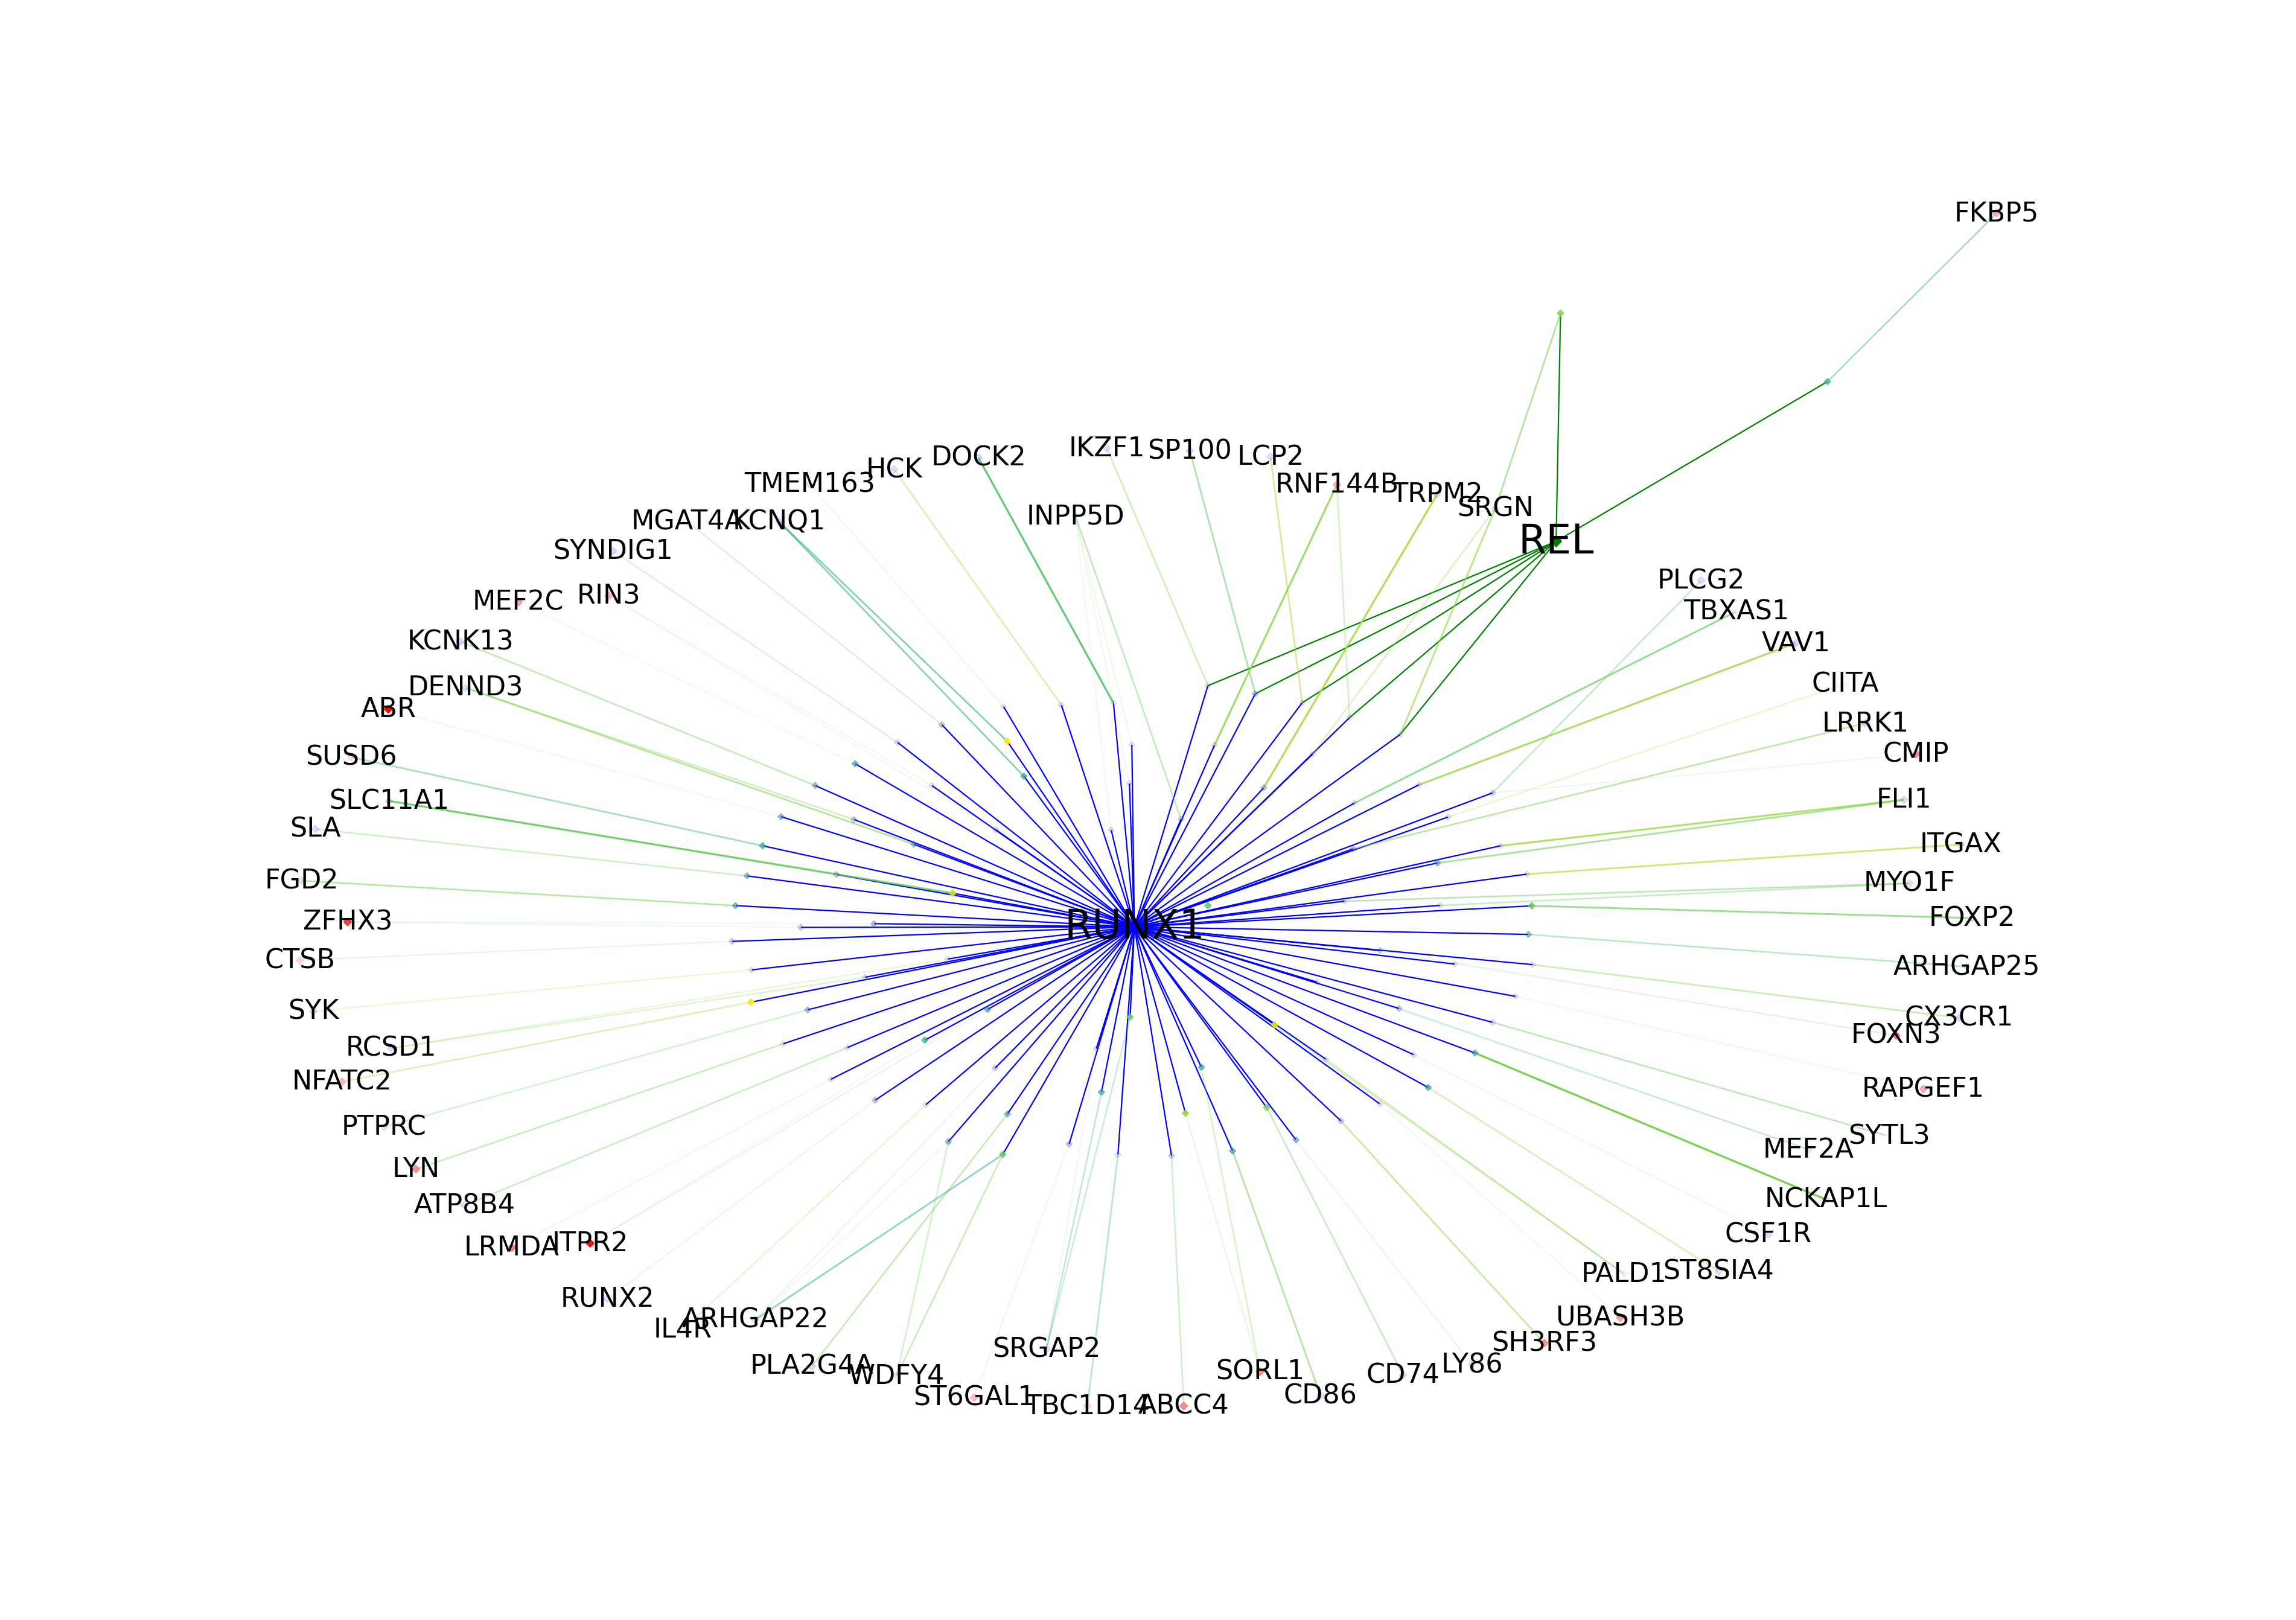

In [78]:
plt.figure(figsize=(24,17))
plot_networkx(G, pos)